#1 - Bibliotecas.

In [1]:
pip install verstack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
import plotly.express as px
from pandas_profiling import ProfileReport
import plotly.graph_objects as go

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
#import pyautogui

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.inspection import permutation_importance
from category_encoders.target_encoder import TargetEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import math

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import FeatureImportances

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (15, 8)
#sak.typewrite("PythonCoder")
#sak.typewrite("PythonCoder", interval = 0.30)

#2 - Leitura do Banco de Dados.

In [5]:
estudo = pd.read_excel("/content/Base até 200k.xlsx")

In [6]:
estudo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135 entries, 0 to 1134
Data columns (total 51 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Nº Contrato (CRM)                   1135 non-null   int64         
 1   ID                                  955 non-null    float64       
 2   Cliente                             1135 non-null   object        
 3   Produto                             1135 non-null   object        
 4   Valor Contrato                      1135 non-null   object        
 5   Valor Solicitado                    1135 non-null   float64       
 6   Diferença Crédito                   1134 non-null   float64       
 7   Data Base Assinatura                1135 non-null   datetime64[ns]
 8   Safra Ano                           1135 non-null   int64         
 9   Safra Mensal                        1135 non-null   object        
 10  PF | PJ                 

In [7]:
estudo.isnull().sum()

Nº Contrato (CRM)                        0
ID                                     180
Cliente                                  0
Produto                                  0
Valor Contrato                           0
Valor Solicitado                         0
Diferença Crédito                        1
Data Base Assinatura                     0
Safra Ano                                0
Safra Mensal                             0
PF | PJ                                  0
(%) LTV Tomado                           0
Score Combinado                          0
Taxa ao Mês                              0
Taxa ao Ano                              0
Comprometimento da Renda (Líquido)       0
Comprometimento da Renda                 0
Prazo                                    0
Carência (Dias)                          0
Tipo de Carência                       204
Motivo do Empréstimo                   386
Modelo de Renda                          0
Renda Apurada                            0
Renda Infor

#3 - Visualização Preliminar dos Dados.

* Convertendo o formato dos dados:

In [8]:
columns= ['Valor Contrato']

for col in columns:
    estudo[col] = pd.to_numeric(estudo[col], errors='coerce')

* Convertendo algumas colunas de forma manual:

A colunas "LTV Atual" tem algumas linhas em string, então é realizado uma recatecorização:

In [9]:
replace_map = {
    "% LTV Atual": {"Apurar": 0}
               }
estudo = estudo.replace(replace_map)

In [10]:
estudo['Score Combinado'] = estudo['Score Combinado'].astype('float')
estudo['Prazo'] = estudo['Prazo'].astype('float')
estudo['Carência (Dias)'] = estudo['Carência (Dias)'].astype('float')
estudo['% LTV Atual'] = estudo['% LTV Atual'].astype('float')
estudo['Quantidade de Dividas'] = estudo['Quantidade de Dividas'].astype('float')
estudo['Quantidade de Imóveis'] = estudo['Quantidade de Imóveis'].astype('float')

In [11]:
estudo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135 entries, 0 to 1134
Data columns (total 51 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Nº Contrato (CRM)                   1135 non-null   int64         
 1   ID                                  955 non-null    float64       
 2   Cliente                             1135 non-null   object        
 3   Produto                             1135 non-null   object        
 4   Valor Contrato                      1134 non-null   float64       
 5   Valor Solicitado                    1135 non-null   float64       
 6   Diferença Crédito                   1134 non-null   float64       
 7   Data Base Assinatura                1135 non-null   datetime64[ns]
 8   Safra Ano                           1135 non-null   int64         
 9   Safra Mensal                        1135 non-null   object        
 10  PF | PJ                 

In [12]:
estudo.columns

Index(['Nº Contrato (CRM)', 'ID', 'Cliente', 'Produto', 'Valor Contrato',
       'Valor Solicitado', 'Diferença Crédito', 'Data Base Assinatura',
       'Safra Ano', 'Safra Mensal', 'PF | PJ', '(%) LTV Tomado',
       'Score Combinado', 'Taxa ao Mês', 'Taxa ao Ano',
       'Comprometimento da Renda (Líquido)', 'Comprometimento da Renda',
       'Prazo', 'Carência (Dias)', 'Tipo de Carência', 'Motivo do Empréstimo',
       'Modelo de Renda', 'Renda Apurada', 'Renda Informada',
       'Renda Necessária', 'Diferença Renda', 'Ticket', 'Produto CRM',
       'Status Atual', 'Bacen Prezuizo', 'Bacen Valor à Vencer',
       'Bacen Vencidos', 'Quantidade de Dividas', 'Quantidade de Imóveis',
       'Cidade', 'Produto Ajustado', 'Data Vencimento', 'Aging',
       'Faixa Atraso', 'Valor Atraso', 'Saldo a Vencer',
       'Saldo Total Cart. Set.', 'Diferença contrato/imovel', 'Tipo do Ativo',
       'Valor do Ativo', '% LTV Atual', 'Esteira Régua Cob', 'Status Execução',
       'Situação Execução',

In [13]:
#Diferença Crédito - Valor Solicitado - Prazo - Renda Necessária - Diferença Renda - Bacen Prezuizo - Bacen Valor à Vencer
#Bacen Vencidos - Quantidade de Dividas - Quantidade de Imóveis - Cidade - Diferença contrato/imovel - Tipo do Ativo

* Separando as features numerica e categorica em objetos separados:

In [14]:
estudo_cat = estudo.select_dtypes(include=['object'])
estudo_num = estudo.select_dtypes(include=['float64'])
#estudo_int = estudo.select_dtypes(include=['int64'])

###3.1 - Categoricas.

* Análisar a saúde dos dados e encontrar pontos que precisam de tratamento.

####3.1.1 - Produto.

In [15]:
px.histogram(estudo, x='Produto', text_auto=True, width=1000, height=500,
             labels={'Produto':'Produtos CashMe'},
             title='')

* Peso de cada produto na carteira.

In [16]:
px.histogram(estudo, x='Produto', text_auto=True, histnorm='percent', width=1000, height=500,
             labels={'Produto':'Produtos CashMe'}, 
             title='Participação de cada produto na carteira CashMe')

####3.1.2 - Produto CRM.

In [17]:
px.histogram(estudo, x='Produto CRM', text_auto=True, width=1000, height=500,
             labels={'Produto':'Produtos CashMe'},
             title='')

* Peso de cada produto na carteira.

In [18]:
px.histogram(estudo, x='Produto CRM', text_auto=True, histnorm='percent', width=1000, height=500,
             labels={'Produto CRM':'Produtos CRM CashMe'},
             title='')

####3.1.3 - Produto Ajustado.

In [19]:
px.histogram(estudo, x='Produto Ajustado', text_auto=True, width=1000, height=500,
             labels={'Produto Ajustado':'Produtos Ajustado CashMe'},
             title='')

* Participação dos produtos ajustados na carteira. 

In [20]:
px.histogram(estudo, x='Produto Ajustado', text_auto=True, histnorm='percent', width=1000, height=500,
             labels={'Produto Ajustado':'Produtos Ajustado CashMe'},
             title='')

####3.1.4 - Modelo de Renda.

In [21]:
px.histogram(estudo, x='Modelo de Renda', text_auto=True, width=1000, height=500,
             labels={''},
             title='')

* Peso dos modelos de renda na carteira.

In [22]:
px.histogram(estudo, x='Modelo de Renda', text_auto=True, histnorm='percent', width=1000, height=500,
             labels={''},
             title='')

####3.1.5 - Motivo do Empréstimo.

In [23]:
px.histogram(estudo, x='Motivo do Empréstimo', text_auto=True, width=1000, height=500,
             labels={''},
             title='')

* Peso de cada Motivo de Empréstimo na carteira.

In [24]:
px.histogram(estudo, x='Motivo do Empréstimo', text_auto=True, histnorm='percent', width=1000, height=500,
             labels={''},
             title='')

####3.1.6 - Status Atual.

In [25]:
px.histogram(estudo, x='Status Atual', text_auto=True, width=1000, height=500,
             labels={''},
             title='')

* Peso de cada status na carteira.

In [26]:
px.histogram(estudo, x='Status Atual', text_auto=True, histnorm='percent', width=1000, height=500,
             labels={''},
             title='')

####3.1.7 - PF | PJ.

In [27]:
px.histogram(estudo, x='PF | PJ', text_auto=True, width=1000, height=500,
             labels={''},
             title='')

* Peso entre PF e PJ na carteir.

In [28]:
px.histogram(estudo, x='PF | PJ', text_auto=True, histnorm='percent', width=1000, height=500,
             labels={''},
             title='')

####3.1.8 - Tipo de Carência.

In [29]:
px.histogram(estudo, x='Tipo de Carência', text_auto=True, width=1000, height=500,
             labels={''},
             title='')

* Peso de cada Tipo de Carência na Carteira.

In [30]:
px.histogram(estudo, x='Tipo de Carência', text_auto=True, histnorm='percent', width=1000, height=500,
             labels={''},
             title='')

####3.1.9 - Ticket.

In [31]:
px.histogram(estudo, x='Ticket', text_auto=True, width=1000, height=500,
             labels={''},
             title='')

* Peso de cada Ticket na Carteira.

In [32]:
px.histogram(estudo, x='Ticket', text_auto=True, histnorm='percent', width=1000, height=500,
             labels={''}, 
             category_orders = {"Ticket": ["Até 200 K", "De 200.000,01 Até 400 K", "De 400.000,01 Até 600 K","De 600.000,01 Até 800 K","De 800.000,01 Até 1 MM","Acima de 1 MM"]},
             title='')

####3.1.10 - Esteira Régua Cob.

In [33]:
px.histogram(estudo, x='Esteira Régua Cob', text_auto=True, width=1000, height=500,
             labels={''},
             title='')

* Peso de cada Régua da Esteira de Cobranças.

In [34]:
px.histogram(estudo, x='Esteira Régua Cob', text_auto=True, histnorm='percent', width=1000, height=500,
             labels={"Esteira Régua Cob": "Régua da Esteria de Cobranças"},
             title='')

####3.1.11 - Status Execução.

In [35]:
px.histogram(estudo, x='Status Execução', text_auto=True, width=1000, height=500,
             labels={''},
             title='')

####3.1.12 - Situação Execução.

In [36]:
px.histogram(estudo, x='Situação Execução', text_auto=True, width=1000, height=500,
             labels={''},
             title='')

* Peso de Cada Situação de Execução na carteira.
obs: Essa feature tem muito dado faltante, não trazendo tanta confiabilidade no seu peso.

In [37]:
px.histogram(estudo, x='Situação Execução', text_auto=True, width=1000, height=500,
             labels={''}, histnorm='percent',
             title='')

#### 3.1.13 - Safra Mensal.

In [38]:
px.histogram(estudo, x='Safra Mensal', text_auto=True, width=1000, height=500,
             labels={''},
             title='',
             category_orders={
                "Safra Mensal": ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago","Set"]})

* Peso de Cada Mês na Carteira.

In [39]:
px.histogram(estudo, x='Safra Mensal', text_auto='.2f', width=1000, height=500,
             labels={''}, histnorm='percent',
             title='')

#### 3.1.14 - Faixa Atraso.

In [40]:
px.histogram(estudo, x='Faixa Atraso', text_auto=True, width=1000, height=500,
             labels={''},
             title='')

* Peso de cada faixa de atraso na carteira.

In [41]:
px.histogram(estudo, x='Faixa Atraso', text_auto=True, width=1000, height=500,
             labels={''}, histnorm='percent',
             title='')

* Recategorizando:

In [42]:
estudo["Faixa de Atraso - Grupos"] = estudo['Faixa Atraso']

In [43]:
replace_map = {
    "Faixa de Atraso - Grupos": {"Adimplente": 'Adimplente',
                               "QUITADO": 'Quitado',
                                # Faixa 1:
                                "A. Entre 05 a 30": 'A. Atraso de 05 a 30',
                                # Faixa 2:
                                "B. Entre 31 a 60": 'B. Atraso de 31 a 90',     
                                "C. Entre 61 a 90": 'B. Atraso de 31 a 90',
                                # Faixa 3:
                                "D. Entre 91 a 120": 'C. Atraso de 91 a 121>',
                                "E. Entre 121 a 150": 'C. Atraso de 91 a 121>'}
               }

estudo = estudo.replace(replace_map)

In [44]:
estudo["Faixa de Atraso - Grupos"].value_counts()

Adimplente                757
Quitado                   180
A. Entre 05 a 30          150
B. Atraso de 31 a 90       43
C. Atraso de 91 a 121>      5
Name: Faixa de Atraso - Grupos, dtype: int64

In [45]:
px.histogram(estudo, x='Faixa de Atraso - Grupos', text_auto=True, width=1000, height=500,
             labels={''},
             title='Grupos de Atraso Simplificados')

In [46]:
px.histogram(estudo, x='Faixa de Atraso - Grupos', text_auto=True, width=1000, height=500,
             labels={''}, histnorm='percent',
             title='Grupos de Atraso Simplificados')

####3.1.15 - Tipo do Ativo.

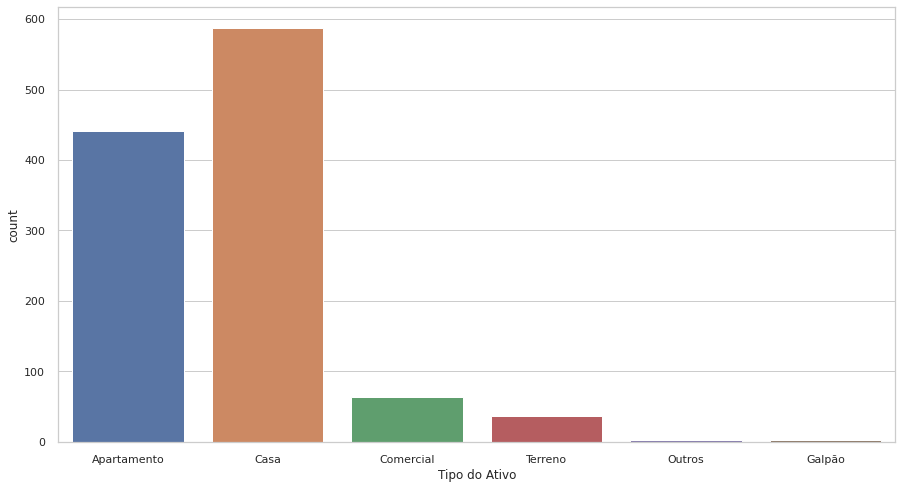

In [47]:
sns.countplot(x=estudo['Tipo do Ativo'])

In [48]:
px.histogram(estudo, x='Tipo do Ativo', text_auto=True, width=1000, height=500,
             labels={''},
             title='Grupos de Atraso Simplificados')

#####Observações.

As colunas "Valor Contrato" e "% LTV Atual" são numericas e não categoricas.

* Recat. o % LTV Atual.

In [49]:
estudo_cat.columns

Index(['Cliente', 'Produto', 'Safra Mensal', 'PF | PJ', 'Tipo de Carência',
       'Motivo do Empréstimo', 'Modelo de Renda', 'Ticket', 'Produto CRM',
       'Status Atual', 'Cidade', 'Produto Ajustado', 'Faixa Atraso',
       'Tipo do Ativo', 'Esteira Régua Cob', 'Status Execução',
       'Situação Execução'],
      dtype='object')

###3.2 - Númericas.

####3.2.1 - (%) LTV Tomado.

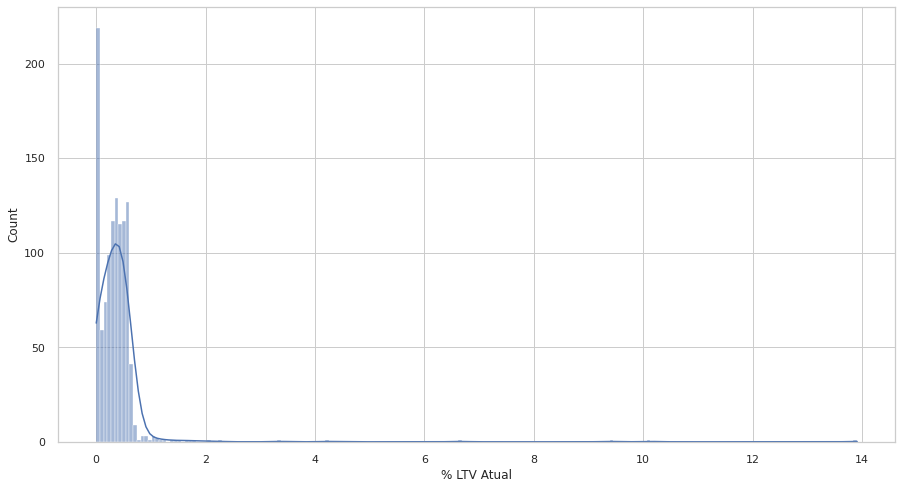

In [50]:
sns.histplot(x=estudo["% LTV Atual"], kde=True)

replace_map = {
    "% LTV Atual": {"Apurar": 0}
               }
estudo = estudo.replace(replace_map)

In [51]:
replace_map = {
    "% LTV Atual": {"Apurar": 0}
               }
estudo = estudo.replace(replace_map)

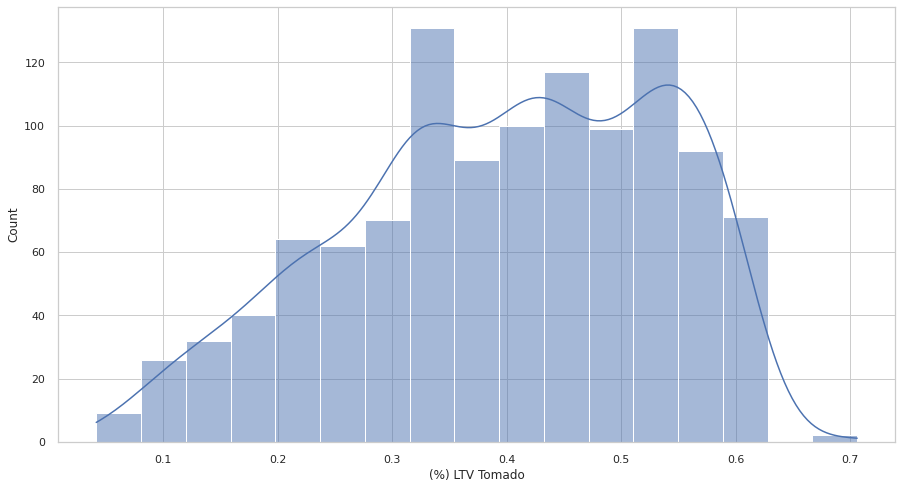

In [52]:
sns.histplot(x=estudo["(%) LTV Tomado"], kde=True)

#### 3.2.2 - Taxa ao Mês.

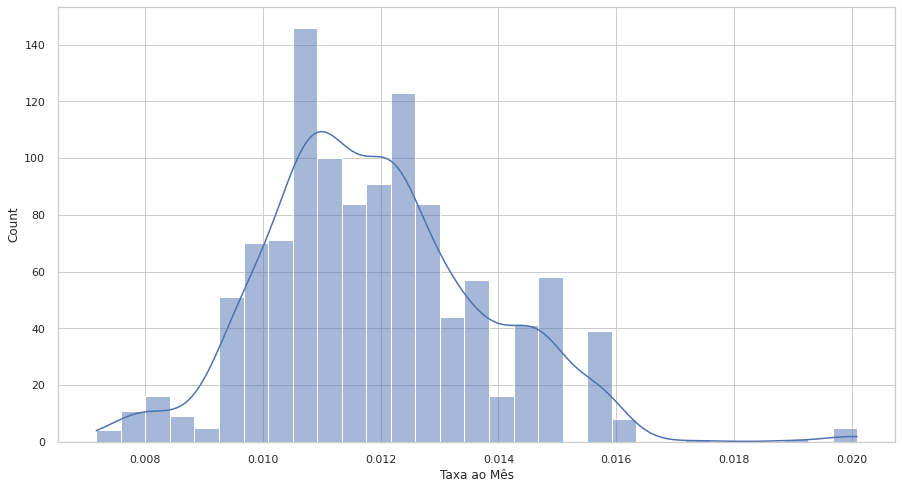

In [53]:
sns.histplot(x=estudo["Taxa ao Mês"], kde=True)

#### 3.2.3 - Taxa ao Ano.

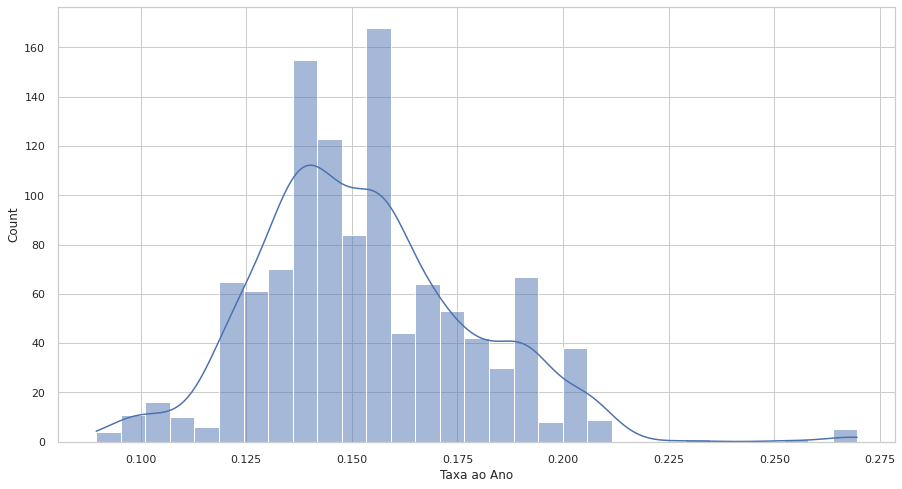

In [54]:
sns.histplot(x=estudo["Taxa ao Ano"], kde=True)

#### 3.2.4 - Comprometimento de Renda (Líquido).

In [91]:
estudo["Comprometimento da Renda (Líquido)"] = estudo["Comprometimento da Renda (Líquido)"]*100

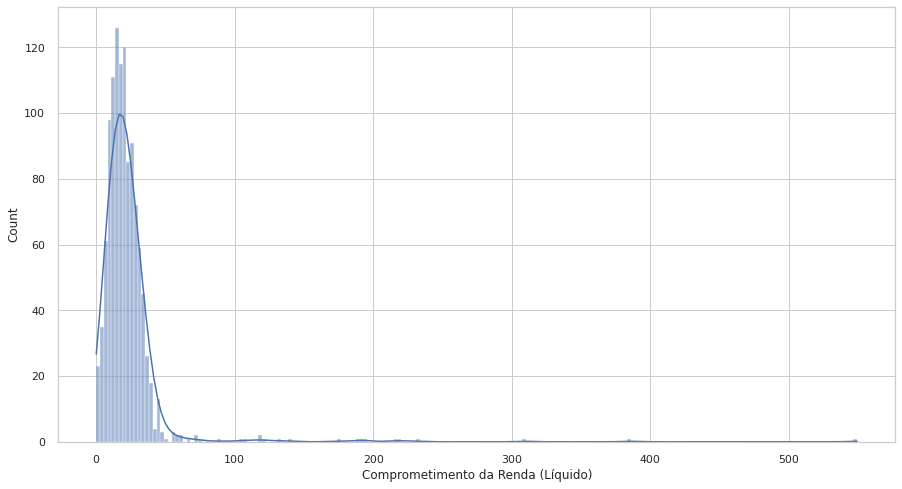

In [92]:
sns.histplot(x=estudo["Comprometimento da Renda (Líquido)"], kde=True)

* Um outro plot:

In [93]:
px.strip(estudo, x=estudo["Comprometimento da Renda (Líquido)"], width=1000, height=600)

* Criando uma variavel categorica do comprometimento de renda líquido:

In [106]:
def evaluate(values):

    if values >=0 and values <=10:
        return '0% a 10%'
    elif values >10 and values <=20:
        return '10% a 20%'
    elif values >20 and values <=30:
        return '20% a 30%'
    elif values >30 and values <=40:
        return '30% a 40%'
    elif values >40 and values <=50:     
        return '40% a 50%'
    elif values >50:
        return 'Acima de 50%'        

estudo['Comprometimento da Renda (Líquido) - cat'] = estudo['Comprometimento da Renda (Líquido)'].apply(lambda x: evaluate(x))

In [107]:
estudo['Comprometimento da Renda (Líquido) - cat'].value_counts().sort_values()

40% a 50%        28
Acima de 50%     30
30% a 40%       138
0% a 10%        177
20% a 30%       330
10% a 20%       432
Name: Comprometimento da Renda (Líquido) - cat, dtype: int64

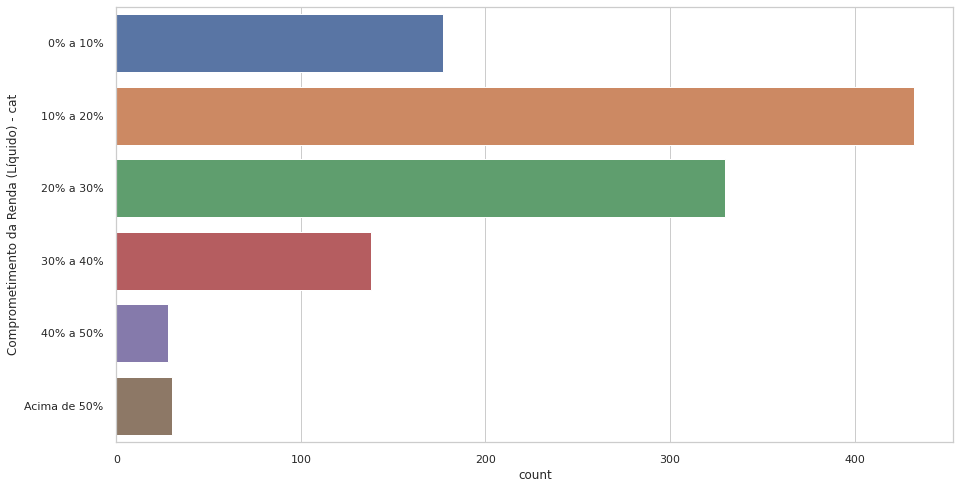

In [108]:
sns.countplot(y=estudo['Comprometimento da Renda (Líquido) - cat'].sort_values())

#### 3.2.5 - Comprometimento de Renda.

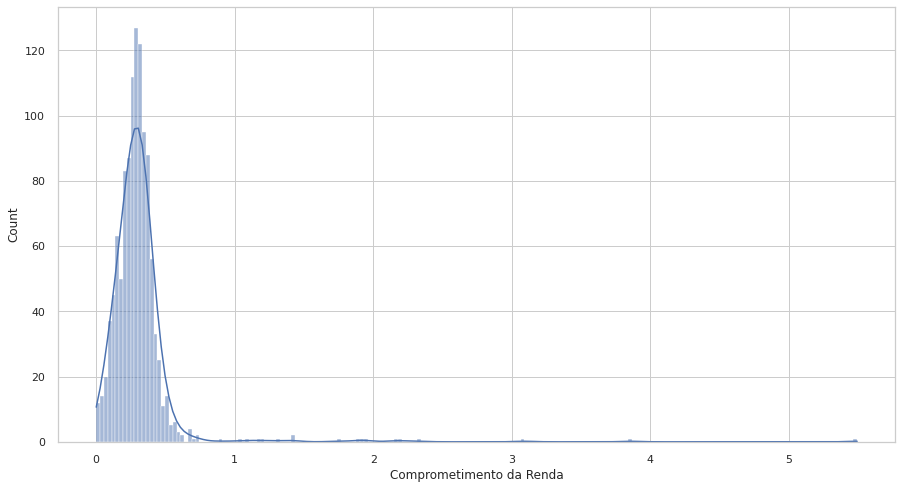

In [60]:
sns.histplot(x=estudo["Comprometimento da Renda"], kde=True)

#### 3.2.6 - Renda Informada.

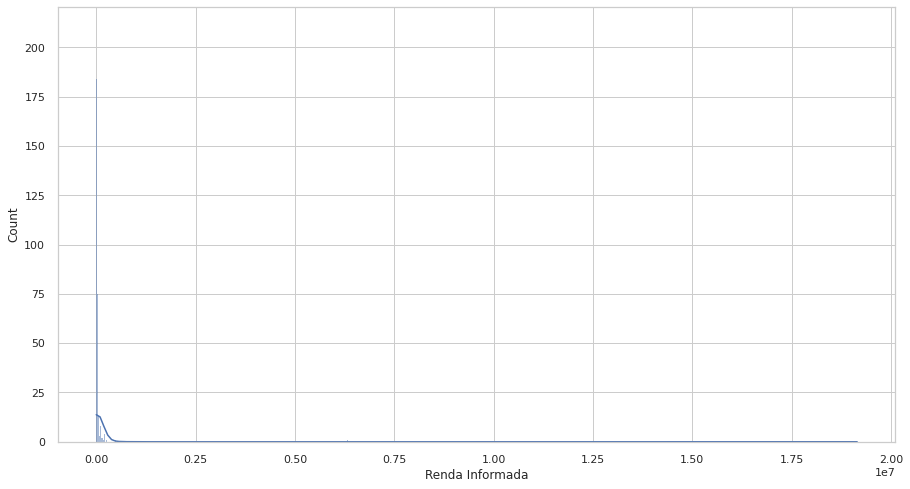

In [61]:
sns.histplot(x=estudo["Renda Informada"], kde=True)

#### 3.2.7 - Aging.

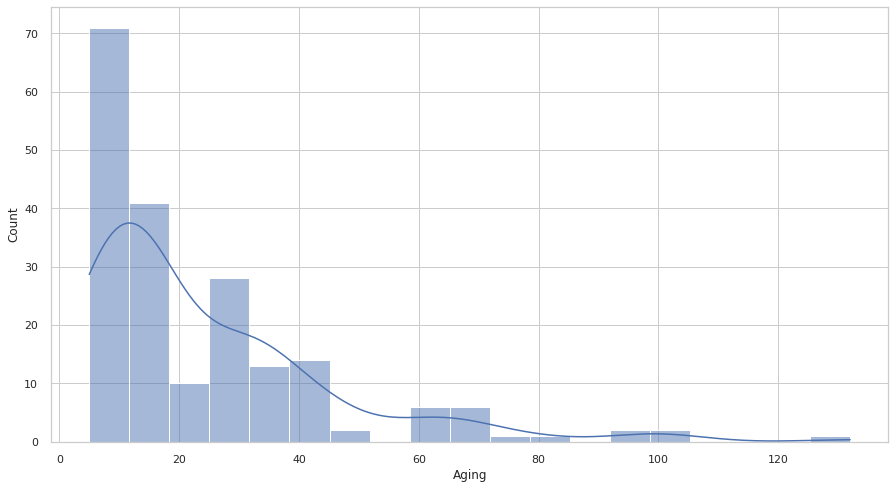

In [62]:
sns.histplot(x=estudo["Aging"], kde=True)

#### 3.2.8 - Saldo a Vencer.

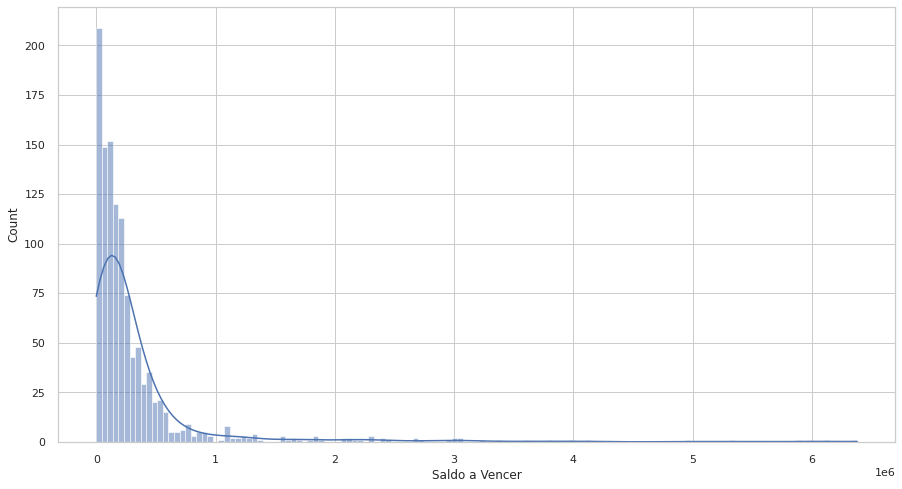

In [63]:
sns.histplot(x=estudo["Saldo a Vencer"], kde=True)

#### 3.2.9 - Saldo Total Cart. Setembro.

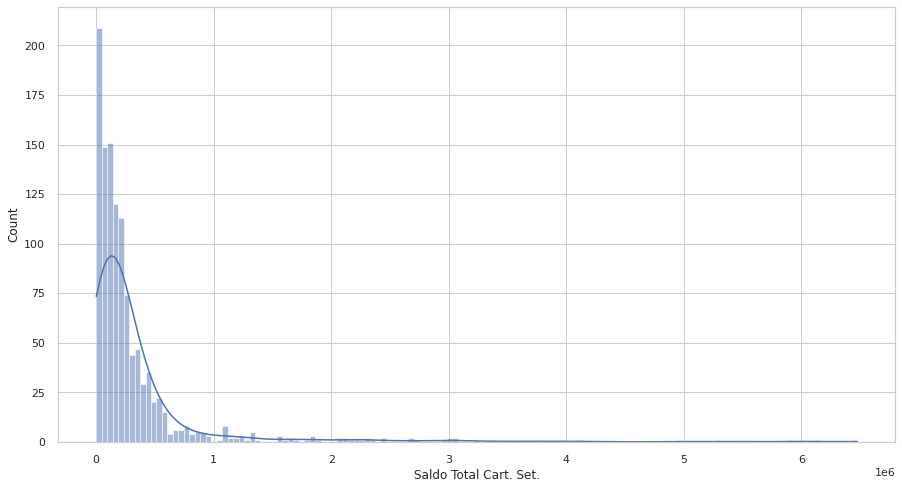

In [64]:
sns.histplot(x=estudo["Saldo Total Cart. Set."], kde=True)

#### 3.2.10 - Valor do Ativo.

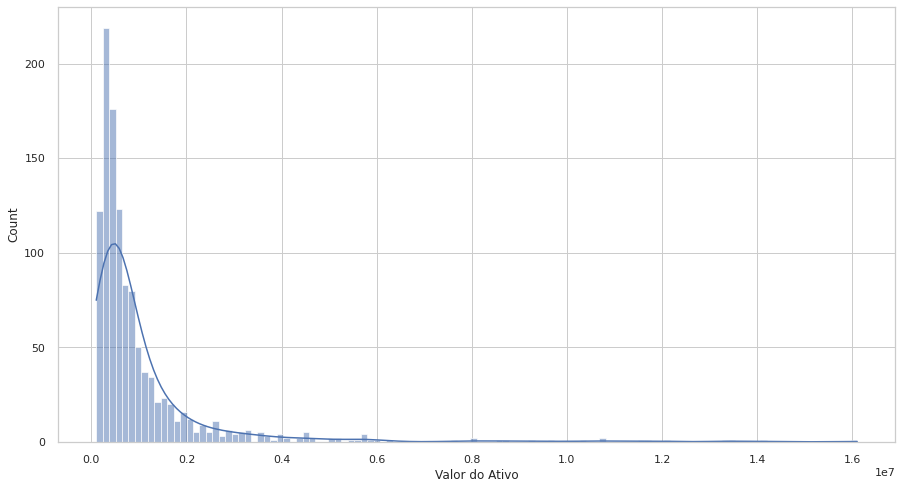

In [65]:
sns.histplot(x=estudo["Valor do Ativo"], kde=True)

#### 3.2.11 - LTV Atual.

* Na base o LTV atual tem algumas linhas escrito "Apurar", nesse caso essa string foi transformada no valor 0 no inicio do "Cap 3".

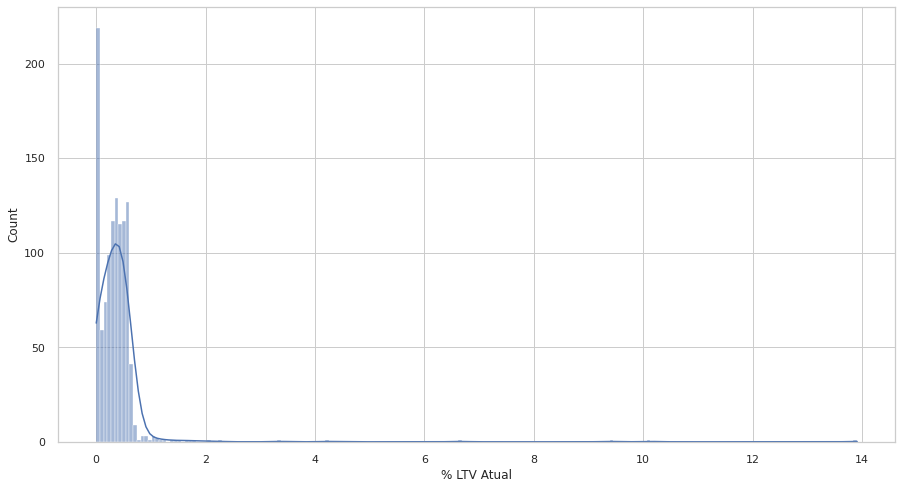

In [66]:
sns.histplot(x=estudo["% LTV Atual"], kde=True)

#### 3.2.12 - Score Combinado.

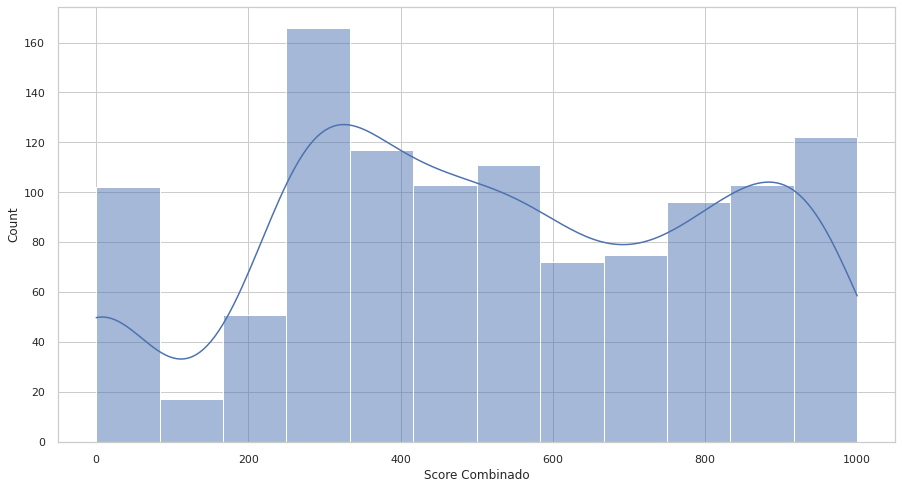

In [67]:
sns.histplot(x=estudo["Score Combinado"], kde=True)

#### 3.2.13 - Carência (Dias).

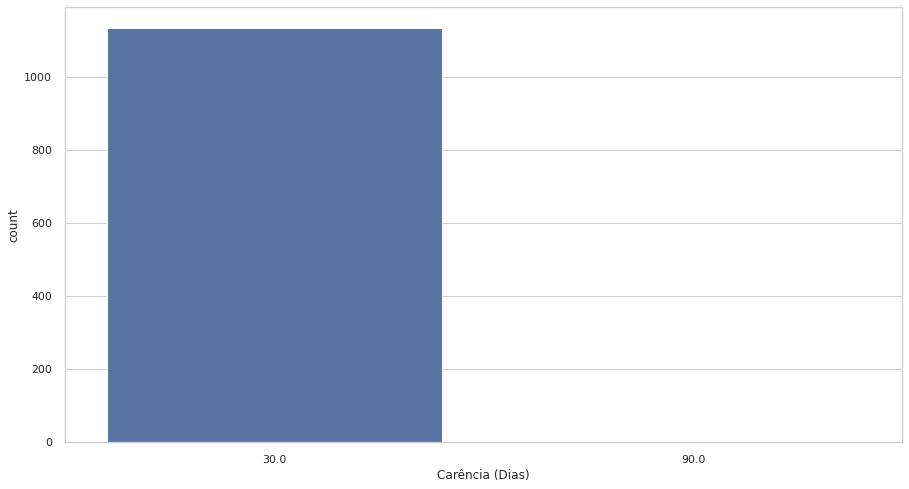

In [68]:
sns.countplot(x=estudo["Carência (Dias)"])

#### 3.2.14 - Aging.

In [69]:
replace_map = {
    "Aging": {np.nan: 0}
               }
estudo = estudo.replace(replace_map)

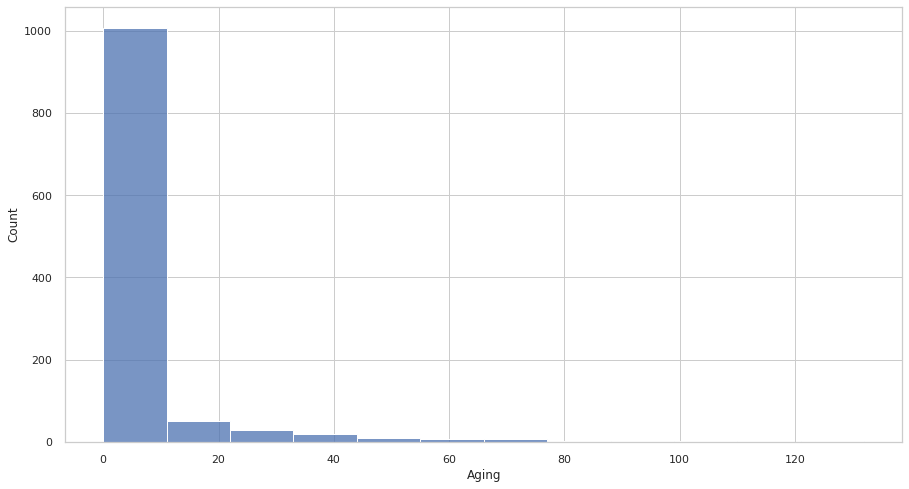

In [70]:
sns.histplot(x=estudo["Aging"])

#### 3.2.15 - Valor Contrato.

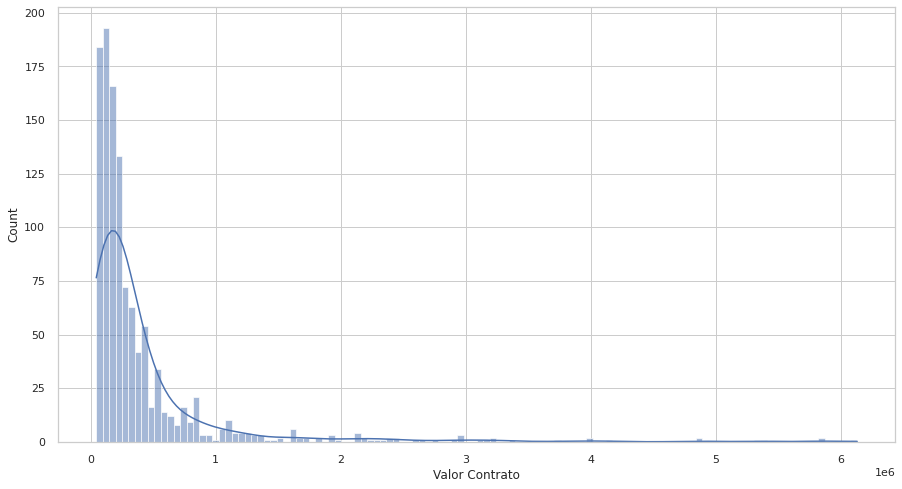

In [71]:
sns.histplot(x=estudo["Valor Contrato"], kde=True)

#### 3.2.16 - Diferença Crédito.

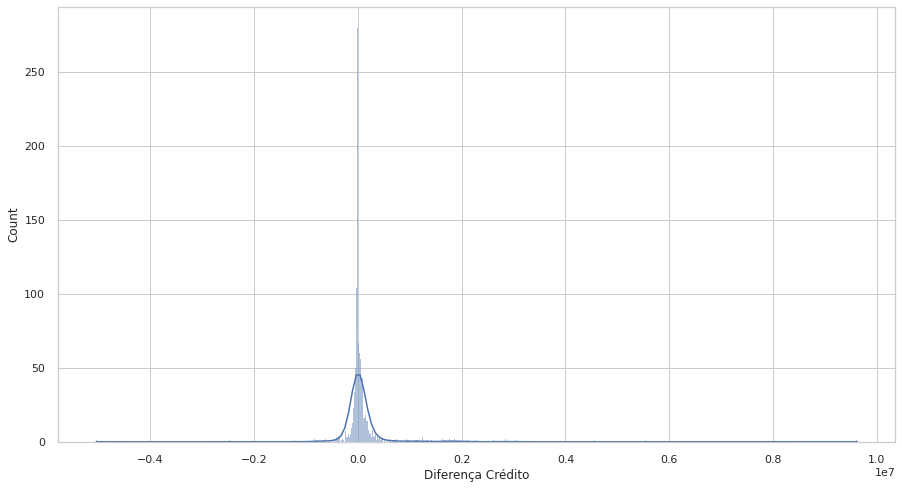

In [72]:
sns.histplot(x=estudo['Diferença Crédito'], kde=True)

#### 3.2.17 - Valor Solicitado.

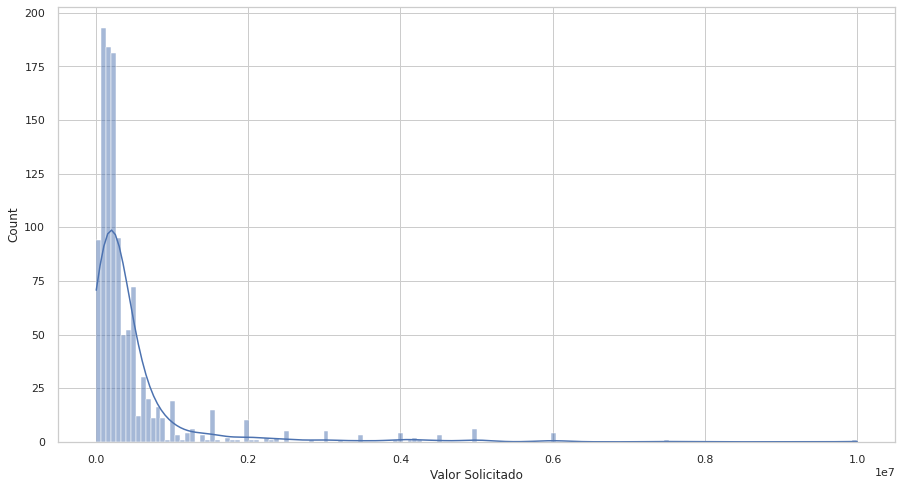

In [73]:
sns.histplot(x=estudo["Valor Solicitado"], kde=True)

#### 3.2.18 - Prazo.

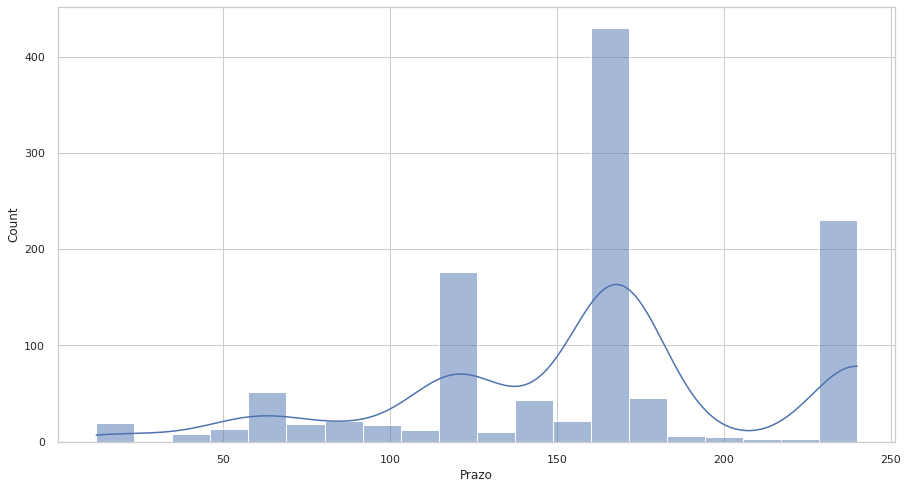

In [74]:
sns.histplot(x=estudo['Prazo'],kde=True)

#### 3.2.19 - Renda Necessária.

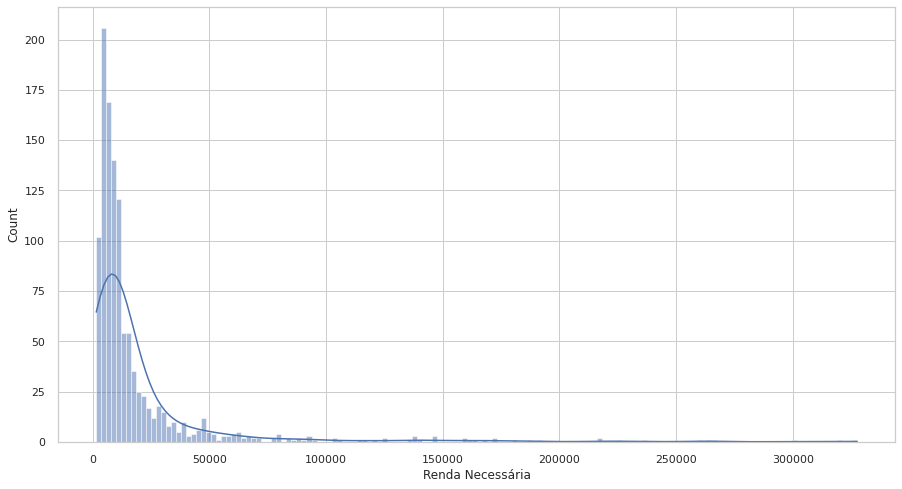

In [75]:
sns.histplot(x=estudo['Renda Necessária'], kde=True)

#### 3.2.20 - Diferença Renda.

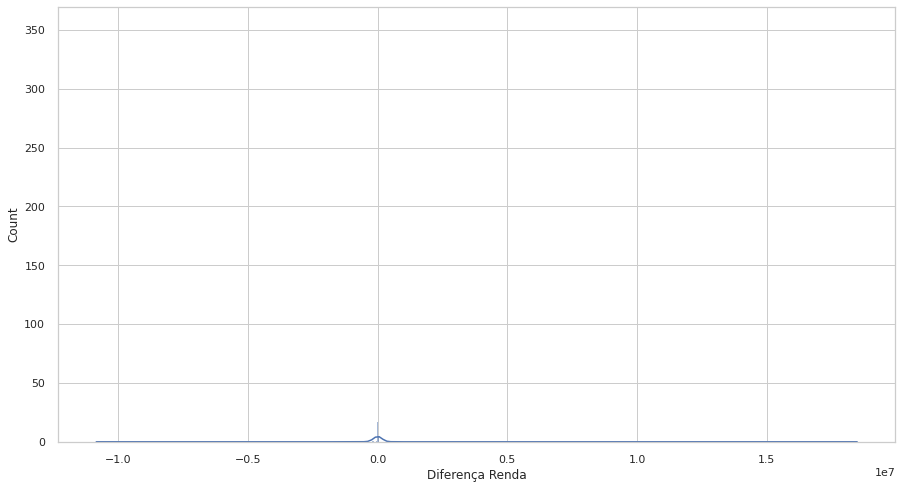

In [76]:
sns.histplot(x=estudo['Diferença Renda'], kde=True)

#### 3.2.21 - Bacen Prezuizo.

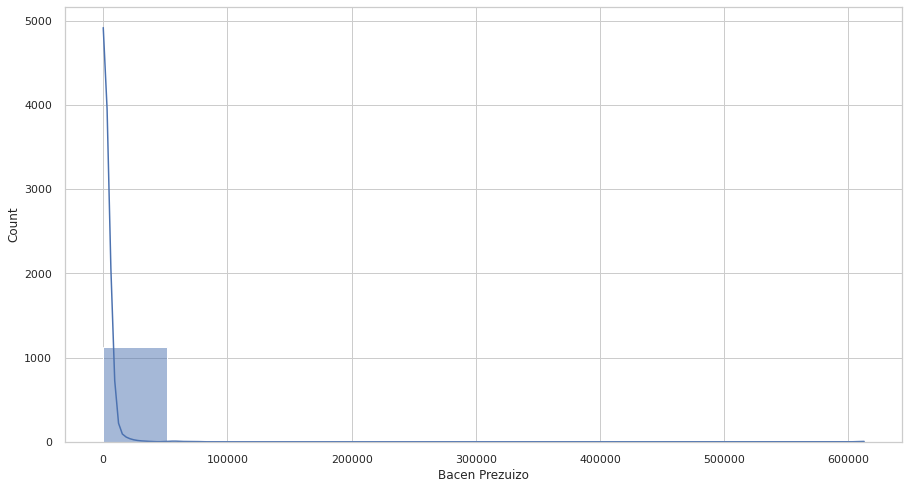

In [77]:
sns.histplot(x=estudo['Bacen Prezuizo'], kde=True)

#### 3.2.22 - Bacen Valor á Vencer.

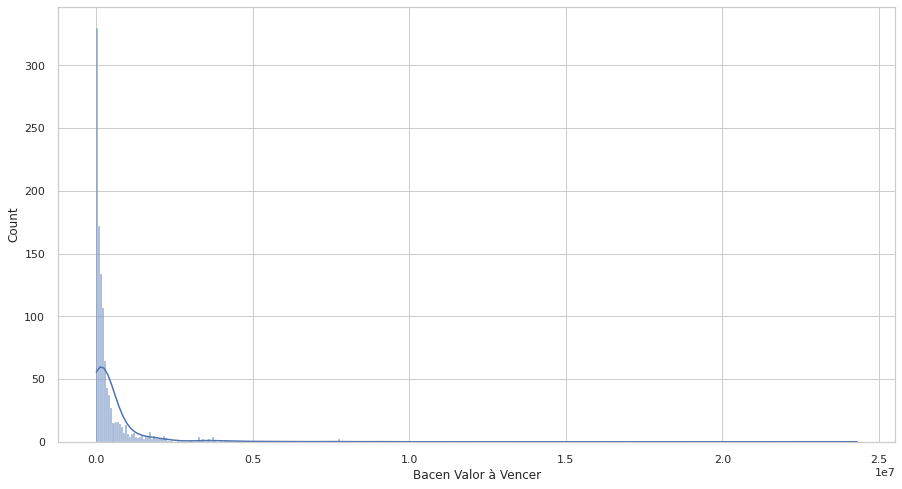

In [78]:
sns.histplot(x=estudo['Bacen Valor à Vencer'], kde=True)

#### 3.2.23 - Bacen Vencidos.

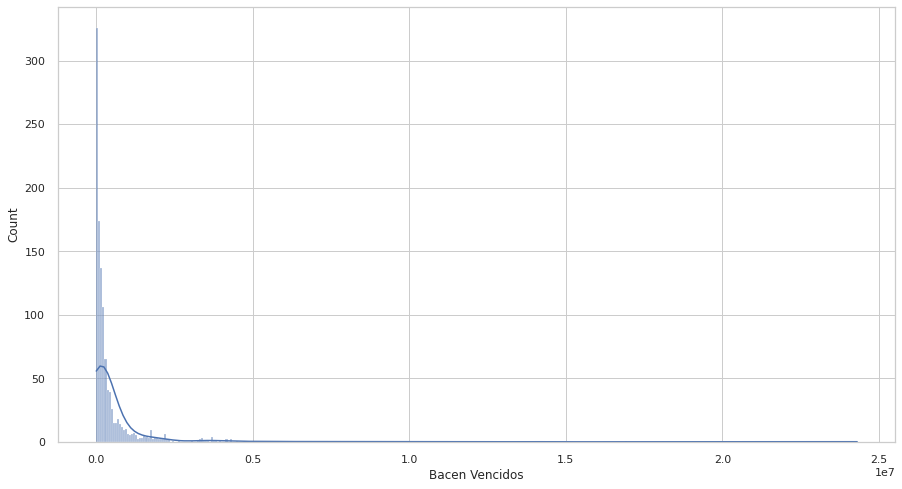

In [79]:
sns.histplot(x=estudo['Bacen Vencidos'], kde=True)

#### 3.2.24 - Quantidade de Dividas.

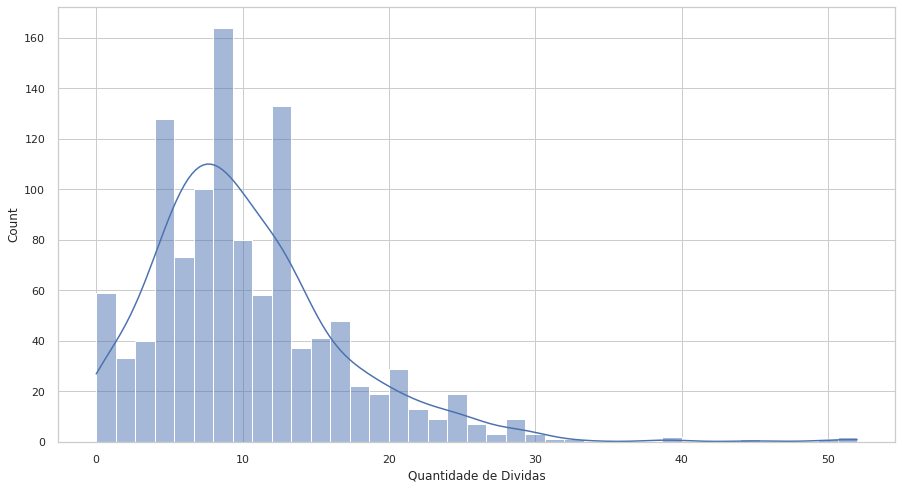

In [80]:
sns.histplot(x=estudo['Quantidade de Dividas'], kde=True)

In [101]:
def evaluate(values):

    if values >=0 and values <=1:
        return '0 a 1'
    elif values >1 and values <=5:
        return '1 a 5'
    elif values >5 and values <=10:
        return '5 a 10'
    elif values >10 and values <=15:
        return '10 a 15'
    elif values >15 and values <=20:     
        return '15 a 20'
    elif values >20:
        return 'Acima de 20'        

estudo['Quantidade de Dividas - cat'] = estudo['Quantidade de Dividas'].apply(lambda x: evaluate(x))

In [102]:
estudo['Quantidade de Dividas - cat'].value_counts().sort_values()

0 a 1           59
Acima de 20     84
15 a 20        105
1 a 5          201
10 a 15        269
5 a 10         417
Name: Quantidade de Dividas - cat, dtype: int64

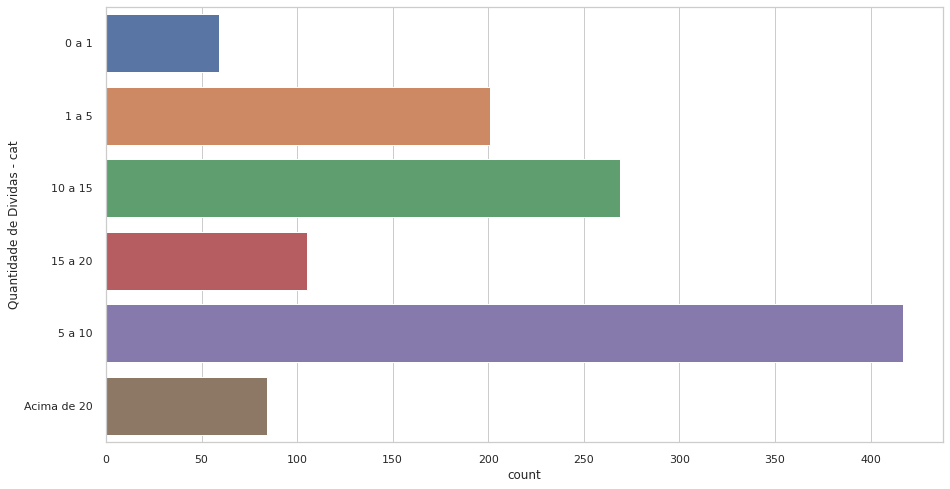

In [103]:
sns.countplot(y=estudo['Quantidade de Dividas - cat'].sort_values())

#### 3.2.25 - Quantidade de Imóveis.

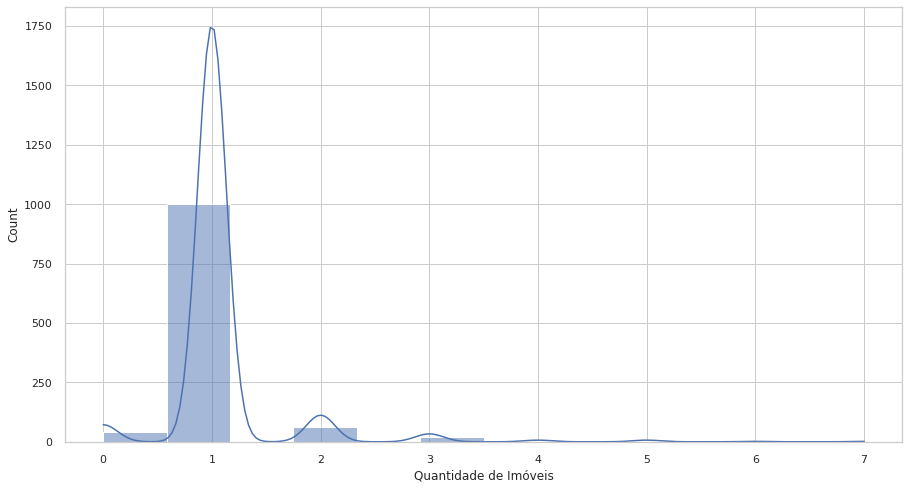

In [81]:
sns.histplot(x=estudo['Quantidade de Imóveis'], kde=True)

#### 3.2.26 - Diferença contrato/imovel.

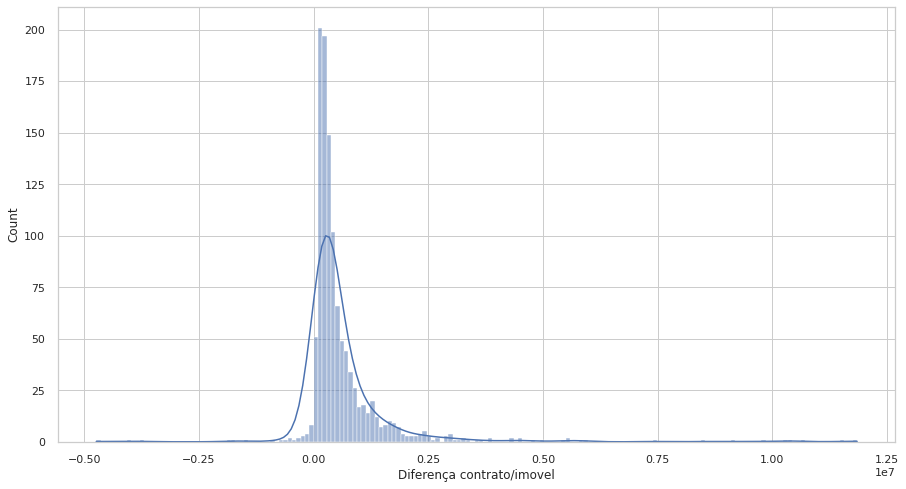

In [82]:
sns.histplot(x=estudo['Diferença contrato/imovel'], kde=True)

##### Observações: 

As colunas "Esteira Ajustada" e "Sub Esteira Ajustada" não contem dados, apenas valores nan.

In [83]:
estudo_num.columns

Index(['ID', 'Valor Contrato', 'Valor Solicitado', 'Diferença Crédito',
       '(%) LTV Tomado', 'Score Combinado', 'Taxa ao Mês', 'Taxa ao Ano',
       'Comprometimento da Renda (Líquido)', 'Comprometimento da Renda',
       'Prazo', 'Carência (Dias)', 'Renda Apurada', 'Renda Informada',
       'Renda Necessária', 'Diferença Renda', 'Bacen Prezuizo',
       'Bacen Valor à Vencer', 'Bacen Vencidos', 'Quantidade de Dividas',
       'Quantidade de Imóveis', 'Aging', 'Valor Atraso', 'Saldo a Vencer',
       'Saldo Total Cart. Set.', 'Diferença contrato/imovel', 'Valor do Ativo',
       '% LTV Atual', 'Esteira Ajustada', 'Sub Esteira Ajustada'],
      dtype='object')

##### Exporta Base de dados.

In [109]:
estudo.to_csv("estudo_200k.csv")

#4 - Análise Bivariada.

### 4.1 - Faixa de Atrado Como Feature de Interesse.

#### 4.1.1 - Faixa de Atraso vs Produto.

In [84]:
px.histogram(estudo, x='Produto', color='Faixa de Atraso - Grupos',
             barnorm='percent', text_auto='.2f', width=1200, 
             height=600, barmode='relative',
             title='Faixa de Atraso vs Produto')

* Esteira da Régua de Cobrança vs Produto:

In [85]:
px.histogram(estudo, x='Produto', color='Esteira Régua Cob',
             barnorm='percent', text_auto=True, width=1200, 
             height=600, barmode='relative',
             title='Esteira da Régua de Cobrança vs Produto')

* Esteira da Régua de Cobrança vs Produto:

In [86]:
px.histogram(estudo, x='Produto', color='Status Atual',
             barnorm='percent', text_auto=True, width=1200, 
             height=600, barmode='relative',
             title='Esteira da Régua de Cobrança vs Produto')

#### 4.1.2 - Faixa de Atraso vs Produtos CRM.

In [87]:
px.histogram(estudo, x='Produto CRM', color='Faixa de Atraso - Grupos',
             barnorm='percent', text_auto=True, width=1200, 
             height=620, barmode='relative',
             title='Faixa de Atraso vs Produtos CRM')

In [88]:
px.histogram(estudo, x='Produto CRM', y='Saldo a Vencer',
             text_auto=True, width=1200, 
             height=620,
             title='Faixa de Atraso vs Produtos CRM')

In [89]:
#cruzar produtos com valor do contrato e valor a vencer. - com as categorias.

* Esteira Régua Cob. vs Produto CRM: 

In [90]:
px.histogram(estudo, x='Produto CRM', color='Esteira Régua Cob',
             barnorm='percent', text_auto=True, width=1200, 
             height=620, barmode='relative',
             title='Esteira Reg. Cobrança vs Produtos CRM',
             labels={'Produto CRM':'Produtos - CRM'})

* Status Atual vs Produtos CRM: - Deixar em primeiro.

In [91]:
px.histogram(estudo, x='Produto CRM', color='Status Atual',
             barnorm='percent', text_auto=True, width=1200, 
             height=600, barmode='relative',
             title='Esteira Reg. Cobrança vs Produtos CRM',
             labels={'Produto CRM':'Produtos - CRM'})

#### 4.1.3 - Faixa de Atraso vs Produto Ajustado.

In [92]:
px.histogram(estudo, x='Produto Ajustado', color='Faixa de Atraso - Grupos',
             barnorm='percent', text_auto=True, width=1200, 
             height=600, barmode='relative',
             title=' Faixa de Atraso vs Produto Ajustado')

* Esteira da Régua de Cobrança vs Produto Ajustado:

In [93]:
px.histogram(estudo, x='Produto Ajustado', color='Esteira Régua Cob',
             barnorm='percent', text_auto=True, width=1200, 
             height=600, barmode='relative',
             title='Esteira da Régua de Cobrança vs Produto Ajustado')

* Status Atual vs Produto Ajustado:

In [94]:
px.histogram(estudo, x='Produto Ajustado', color='Status Atual',
             barnorm='percent', text_auto=True, width=1200, 
             height=600, barmode='relative',
             title='Status Atual vs Produto Ajustado')

#### 4.1.4 - Faixa de Atraso vs Modelo de Renda.

In [95]:
px.histogram(estudo, x='Modelo de Renda', color='Faixa de Atraso - Grupos',
             barnorm='percent', text_auto=True, width=1200, 
             height=600, barmode='relative',
             title=' Faixa de Atraso vs Modelo de Renda')

* Vendo a contagem e volume:

In [96]:
px.histogram(estudo, x='Modelo de Renda', color='Faixa de Atraso - Grupos',
             text_auto=True, width=1200, 
             height=600,
             title=' Faixa de Atraso vs Modelo de Renda')

* Esteira da Régua de Cobrança vs Modelo de Renda:

In [97]:
px.histogram(estudo, x='Modelo de Renda', color='Esteira Régua Cob',
             barnorm='percent', text_auto=True, width=1200, 
             height=600, barmode='relative',
             title='Esteira da Régua de Cobrança vs Modelo de Renda')

* Status Atual vs Modelo de Renda:

In [98]:
px.histogram(estudo, x='Modelo de Renda', color='Status Atual',
             barnorm='percent', text_auto=True, width=1200, 
             height=600, barmode='relative',
             title='Status Atual vs Modelo de Renda')

#### 4.1.5 - Faixa de Atraso vs Motivo do Emprestimo.

In [99]:
px.histogram(estudo, x='Motivo do Empréstimo', color='Faixa de Atraso - Grupos',
             barnorm='percent', text_auto=True, width=1200, 
             height=600, barmode='relative',
             title='Faixa de Atraso vs Motivo do Emprestimo')

In [100]:
#analisar a base de quitados - 

* Esteira da Esteira de Cobrança vs Motivo de Empréstimo:

In [101]:
px.histogram(estudo, x='Motivo do Empréstimo', color='Esteira Régua Cob',
             barnorm='percent', text_auto=True, width=1200, 
             height=600, barmode='relative',
             title='Faixa de Atraso vs Motivo do Emprestimo')

* Status Atual vs Motivo do Empréstimo:

In [102]:
px.histogram(estudo, x='Motivo do Empréstimo', color='Status Atual',
             barnorm='percent', text_auto=True, width=1200, 
             height=600, barmode='relative',
             title='Status Atual vs Motivo do Emprestimo')

#### 4.1.6 - Faixa de Atraso vs Status Atual.

In [103]:
px.histogram(estudo, x='Status Atual', color='Faixa de Atraso - Grupos',
             barnorm='percent', text_auto=True, width=1200, 
             height=600, barmode='relative',
             title=' Faixa de Atraso vs Status Atual')

* Status Atual vs Esteira da Régua de Cobrança:

In [104]:
px.histogram(estudo, x='Status Atual', color='Esteira Régua Cob',
             barnorm='percent', text_auto=True, width=1200, 
             height=600, barmode='relative',
             title=' Status Atual vs Esteira da Régua de Cobrança.')

* Faixa de Atraso vs Esteira Régua Cob:

In [105]:
px.histogram(estudo, x='Faixa de Atraso - Grupos', color='Esteira Régua Cob',
             barnorm='percent', text_auto=True, width=1200, 
             height=600, barmode='relative',
             title='Faixa de Atraso vs Esteira da Régua de Cobrança.')

#### 4.1.7 - Faixa de Atraso vs PJ | PF.

In [106]:
px.histogram(estudo, x='Faixa de Atraso - Grupos', color='PF | PJ',
             barnorm='percent', text_auto=True, width=1200, 
             height=600, barmode='group',
             title='Faixa de Atraso vs Contrato PF | PJ',
             labels={'PF | PJ':'Contratos PF e PJ'})

* Esteira da Régua de Cobrança vs PF | PJ:

In [107]:
px.histogram(estudo, x='Esteira Régua Cob', color='PF | PJ',
             barnorm='percent', text_auto=True, width=1200, 
             height=600, barmode='group',
             title='Faixa de Atraso vs Contrato PF | PJ',
             labels={'PF | PJ':'Contratos PF e PJ'})

* Status Atual vs PF | PJ:

In [108]:
px.histogram(estudo, x='Status Atual', color='PF | PJ',
             barnorm='percent', text_auto=True, width=1200, 
             height=600, barmode='group',
             title='Status Atual vs Contrato PF | PJ',
             labels={'PF | PJ':'Contratos PF e PJ'})

#### 4.1.8 - Faixa de Atraso vs Tipo de Carência.

In [109]:
px.histogram(estudo, x='Tipo de Carência', color='Faixa de Atraso - Grupos',
             barnorm='percent', text_auto=True, width=1200, 
             height=600, barmode='group',
             title='Faixa de Atraso vs Tipo de Carência')

* Esteira da Régua de Cobrança vs Tipo de Carência:

In [110]:
px.histogram(estudo, x='Tipo de Carência', color='Esteira Régua Cob',
             barnorm='percent', text_auto=True, width=1200, 
             height=600, barmode='group',
             title='Esteira da Régua da Cobrança vs Tipo de Carência')

* Status Atual vs Tipo de Carência:

In [111]:
px.histogram(estudo, x='Tipo de Carência', color='Status Atual',
             barnorm='percent', text_auto=True, width=1200, 
             height=600, barmode='group',
             title='Status Atual vs Tipo de Carência')

#### 4.1.9 - Faixa de Atraso vs Ticket.

In [112]:
px.histogram(estudo, x='Ticket', color='Faixa de Atraso - Grupos',
             barnorm='percent', text_auto=True, width=1200, 
             height=600, barmode='relative',
             title='Faixa de Atraso vs Ticket')

In [113]:
px.histogram(estudo, x='Ticket', color='Faixa de Atraso - Grupos',
             barnorm='percent', text_auto=True, width=1200, 
             height=600, barmode='relative',
             title='Esteira da Régua de Cobrança vs Ticket')

In [114]:
px.histogram(estudo, x='Ticket', color='Status Atual',
             text_auto=True, width=1200, 
             height=600,
             title='Status Atual vs Ticket')

#### 4.1.10 - Faixa de Atraso vs Safra Mensal.

In [115]:
px.histogram(estudo, x='Safra Mensal', color='Faixa de Atraso - Grupos',
             histnorm='percent', text_auto='.2f', width=1200, 
             height=600, barmode='relative',
             title=' Faixa de Atraso por Safra Mensal',
             category_orders={
                "Safra Mensal": ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago","Set"]})

* Status Atual vs Safra Mensal:

In [116]:
px.histogram(estudo, x='Safra Mensal', color='Status Atual',
             text_auto=True, width=1200, 
             height=600,
             title='Status Atual vs Ticket')

In [117]:
fig = px.histogram(estudo, x='Safra Mensal', color='Status Atual',
                histnorm='percent', text_auto='.2f', width=1200, 
                height=600, barmode='relative',
                title="Porcentagem de Inadimplentes | Adimplente ao Mês - 2022",
                category_orders={
                    "Safra Mensal": ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago","Set"]},
                labels={'Safra Mensal':'Mês', 'Status Atual':''}, template='plotly',
                color_discrete_map={
                    "Adimplente": "#00bfff", "Inadimplente": "#ff66c4"})
fig.for_each_trace(lambda t: t.update(texttemplate = t.texttemplate +'%'))
fig.show()

In [118]:
estudo['Safra Mensal'].count()

1135

* Esteira da Régua de Cobranças vs Safra Mensal:

In [119]:
px.histogram(estudo, x='Safra Mensal', color='Esteira Régua Cob',
             histnorm='percent', text_auto='.2f', width=1200, 
             height=600, barmode='relative',
             title='Status do Contrato por Safra Mensal',
             category_orders={
                "Safra Mensal": ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago","Set"]})

#### 4.1.11 - Outros cruzamento:

In [120]:
px.histogram(estudo, x='Motivo do Empréstimo', color='PF | PJ',
             barnorm='percent', text_auto='.2f', width=1000, 
             height=500, barmode='group',
             title='')

In [121]:
px.histogram(estudo, x='Motivo do Empréstimo', color='Status Atual',
             barnorm='percent', text_auto='.2f', width=1000, 
             height=500, barmode='group',
             title='')

In [122]:
px.histogram(estudo, x='Safra Mensal', color='Status Atual',text_auto='.2f', width=1000, height=500,
             labels={''}, histnorm='percent',
             title='')

In [123]:
px.histogram(estudo, x='Safra Mensal', color='Status Atual',text_auto=True, width=1000, height=500,
             labels={''}, histnorm='percent',
             title='')

### 4.2 - Filtros & 2º Análise Bivariada.

* Recategorizando se nescessario:
obs: iniciar caso nescessario.

In [ ]:
#replace_map = {
#    "Produto CRM": {"Home Equity": 'Home Equity & SFI',
#                    "Aq. de Imóvel - SFI":'Home Equity & SFI'}
#               }

#estudo_two_pf = estudo.replace(replace_map)

In [ ]:
#estudo_two_pf["Produto CRM"].value_counts()

* Filtrando com a faixa de interesse e apenas PF:

In [110]:
estudo_two = estudo.query('Ticket == "Até 200 K"')

#estudo_twoo_pf = estudo_two_pf.loc[(estudo_two_pf['PF | PJ'].str.startswith('PF'))]
#estudo_twoo_pf = estudo_two_pf.loc[(estudo_two_pf['Produto CRM'].str.startswith('Home Equity & SFI'))]

* Filtrando para o produto a ser observado:

In [111]:
estudinho = estudo_two.loc[(estudo_two['Produto CRM'].str.startswith('Home Equity'))]

* Filtrando a faixa de interesse e apenas PJ:

In [ ]:
#pj = estudo.query('Ticket == "Até 200 K"')

#estudo_twoo_pj = pj.loc[(pj['PF | PJ'].str.startswith('PJ'))]

* Juntando duas Categorias de Interesse:

#### 4.2.1 - Cruzamento  de dados - Segundo o Miro.

##### 4.2.1.1 - Sub Produtos vs Faixa de Atraso.

In [112]:
fig = px.histogram(estudinho, x='Produto CRM', color='Faixa de Atraso - Grupos',
             text_auto=True, width=1200, 
             height=600, barmode='group',
             title='Faixa de Atraso vs Produto - Crédito até 200K',
             labels={'Faixa de Atraso - Grupos':'Faixa de Atraso:'},
             color_discrete_map={
                    "Adimplente": "#00284b", "B. Atraso de 31 a 90": "#ff66c4", "C. A traso de 91 a 121>": "red"})
#fig.for_each_trace(lambda t: t.update(texttemplate = t.texttemplate +'%'))
fig.show()

##### 4.2.1.2 - Comprometimento da Renda (Líquido) vs Safra Mensal / Status Atual.

In [113]:
#estudinho["Comprometimento da Renda (Líquido)"] = estudinho["Comprometimento da Renda (Líquido)"]*100

In [114]:
fig = px.histogram(estudinho, x='Safra Mensal', y='Comprometimento da Renda (Líquido)', color='Status Atual',
                    text_auto='.2f', width=1200, 
                    height=600, barmode='relative', histfunc='avg',
                    title='Comprometimento da Renda (Líquido) - Adimplente vs Indimplente',
                    labels={'Status Atual':'Condição do Contrato'},
                    color_discrete_map={
                    "Adimplente": "#00284b", "Inadimplente": "#ff66c4"},
                    category_orders={
                    "Safra Mensal": ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago","Set"]})
fig.for_each_trace(lambda t: t.update(texttemplate = t.texttemplate +'%'))
fig.show()

* Avaliando com boxplot:

In [115]:
px.box(estudinho, x='Safra Mensal', y='Comprometimento da Renda (Líquido)', color='Status Atual', width=1200, 
                    height=600, color_discrete_map={
                    "Adimplente": "#00284b", "Inadimplente": "#ff66c4"})

In [116]:
fig = px.histogram(estudinho, x='Safra Mensal', color='Status Atual',
                    text_auto='.2f', width=1200, 
                    height=600, barmode='relative', barnorm='percent',
                    title='Quantidade de Contratos (Filtro até 200K) - Adimplente x Inadimplente',
                    labels={'Status Atual':'Condição do Contrato:'},
                    color_discrete_map={
                    "Adimplente": "#00284b", "Inadimplente": "#ff66c4"},
                    category_orders={
                    "Safra Mensal": ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago","Set"]})
fig.for_each_trace(lambda t: t.update(texttemplate = t.texttemplate +'%'))
fig.show()

##### 4.2.1.3 - Safra Mensal vs PF | PJ.

In [117]:
fig = px.histogram(estudinho, x='Safra Mensal', color='PF | PJ',
                    text_auto=True, width=1200, 
                    height=600, barmode='relative',
                    title='Quantidade de Contratos (Filtro até 200K) - PF vs PJ',
                    labels={'PF | PJ':'Tipo de Contrato:'},
                    color_discrete_map={
                    "PF": "#00284b", "PJ": "#ff66c4"},
                    category_orders={
                    "Safra Mensal": ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago","Set"]})
fig.for_each_trace(lambda t: t.update(texttemplate = t.texttemplate +''))
fig.show()

##### 4.2.1.4 - Safra Mensal vs Score Combinado/Status Atual.

In [118]:
fig = px.histogram(estudinho, x='Safra Mensal', y='Score Combinado', color='Status Atual',
                    text_auto='.2f', width=1200, 
                    height=600, barmode='relative', histfunc='avg',
                    title='Score Combinado - Adimplente x Indimplente',
                    labels={'Status Atual':'Condição do Contrato'},
                    color_discrete_map={
                    "Adimplente": "#00284b", "Inadimplente": "#ff66c4"},
                    category_orders={
                    "Safra Mensal": ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago","Set"]})
fig.for_each_trace(lambda t: t.update(texttemplate = t.texttemplate +''))
fig.show()

* Em relação aos contratos PF/PJ:

In [119]:
fig = px.histogram(estudinho, x='Safra Mensal', y='Score Combinado', color='PF | PJ',
                    text_auto='.2f', width=1200, 
                    height=600, barmode='relative', histfunc='avg',
                    title='Score Combinado - PF vs PJ',
                    labels={'Status Atual':'Condição do Contrato'},
                    color_discrete_map={
                    "PF": "#00284b", "PJ": "#ff66c4"},
                    category_orders={
                    "Safra Mensal": ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago","Set"]})
fig.for_each_trace(lambda t: t.update(texttemplate = t.texttemplate +''))
fig.show()

##### 4.2.1.5 - Safra Mensal vs Taxa Mensal/Status do Cliente.

In [120]:
estudinho['Taxa ao Mês'] = estudinho["Taxa ao Mês"]*100

<ipython-input-120-d2602f6fb6b7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [121]:
fig = px.histogram(estudinho, x='Safra Mensal', y='Taxa ao Mês', color='Status Atual',
                    text_auto='.2f', width=1200, 
                    height=600, barmode='relative', histfunc='avg',
                    title='Taxa de Juos Mensal - Adimplente x Indimplente',
                    labels={'Status Atual':'Condição do Contrato'},
                    color_discrete_map={
                    "Adimplente": "#00284b", "Inadimplente": "#ff66c4"},
                    category_orders={
                    "Safra Mensal": ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago","Set"]})
fig.for_each_trace(lambda t: t.update(texttemplate = t.texttemplate +'%'))
fig.show()

##### 4.2.1.6 - Safra Mensal vs Taxa Anual/Status Atual.

In [122]:
estudinho["Taxa ao Ano"] = estudinho["Taxa ao Ano"]*100

<ipython-input-122-73452262463a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [123]:
fig = px.histogram(estudinho, x='Safra Mensal', y='Taxa ao Ano', color='Status Atual',
                    text_auto='.2f', width=1200, 
                    height=600, barmode='relative', histfunc='avg',
                    title='Taxa de Juros Anual - Adimplente x Indimplente',
                    labels={'Status Atual':'Condição do Contrato'},
                    color_discrete_map={
                    "Adimplente": "#00284b", "Inadimplente": "#ff66c4"},
                    category_orders={
                    "Safra Mensal": ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago","Set"]})
fig.for_each_trace(lambda t: t.update(texttemplate = t.texttemplate +'%'))
fig.show()

##### 4.2.1.7 - Safra Mensal vs LTV Tomado.

In [124]:
estudinho["(%) LTV Tomado"] = estudinho["(%) LTV Tomado"]*100

<ipython-input-124-e00b1dffab6d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [125]:
fig = px.histogram(estudinho, x='Safra Mensal', y='(%) LTV Tomado', color='Status Atual',
                    text_auto='.2f', width=1200, 
                    height=600, barmode='relative', histfunc='avg',
                    title='LTV (%) Tomado - Adimplente x Indimplente',
                    labels={'Status Atual':'Condição do Contrato'},
                    color_discrete_map={
                    "Adimplente": "#00284b", "Inadimplente": "#ff66c4"},
                    category_orders={
                    "Safra Mensal": ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago","Set"]})
fig.for_each_trace(lambda t: t.update(texttemplate = t.texttemplate +'%'))
fig.show()

##### 4.2.1.8 - Safra Mensal vs LTV Atual.

In [126]:
estudinho["% LTV Atual"] = estudinho["% LTV Atual"]*100

<ipython-input-126-cf3f94ad9f08>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [127]:
fig = px.histogram(estudinho, x='Safra Mensal', y='% LTV Atual', color='Status Atual',
                    text_auto='.2f', width=1200,
                    height=600, barmode='relative', histfunc='avg',
                    title='LTV (%) Atual - Adimplente x Indimplente',
                    labels={'Status Atual':'Condição do Contrato'},
                    color_discrete_map={
                    "Adimplente": "#00284b", "Inadimplente": "#ff66c4"},
                    category_orders={
                    "Safra Mensal": ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago","Set"]})
fig.for_each_trace(lambda t: t.update(texttemplate = t.texttemplate +'%'))
fig.show()

##### 4.2.1.9 - Modelo de Renda vs PF | PJ.

In [128]:
fig = px.histogram(estudinho, x='Modelo de Renda', color='PF | PJ',
                    text_auto='.2f', width=1200, barnorm='percent',
                    height=600, barmode='relative',
                    title='Quantidade de Contratos PF | PJ por Modelo de Renda',
                    labels={'PF | PJ':'Modelo de Contrato:'},
                    color_discrete_map={
                    "PJ": "#00284b", "PF": "#ff66c4"},
                    category_orders={
                    "Safra Mensal": ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago","Set"]})

fig.for_each_trace(lambda t: t.update(texttemplate = t.texttemplate +'%'))
#fig.write_html('quant. de contratos pf&pj-modelo de renda.'.html)
fig.show()

In [129]:
fig = px.histogram(estudinho, x='Modelo de Renda', color='PF | PJ',
                    text_auto=True, width=1200,
                    height=600,
                    title='Quantidade de Contratos PF | PJ por Modelo de Renda',
                    labels={'PF | PJ':'Modelo de Contrato:'},
                    color_discrete_map={
                    "PJ": "#00284b", "PF": "#ff66c4"},
                    category_orders={
                    "Safra Mensal": ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago","Set"]})

#fig.for_each_trace(lambda t: t.update(texttemplate = t.texttemplate +'%'))
fig.show()

##### 4.2.1.10 - Motivo do Emprestimo vs PF | PJ.

In [130]:
fig = px.histogram(estudinho, x='Motivo do Empréstimo', color='PF | PJ',
                    text_auto=True, width=1200,
                    height=600,
                    title='Quantidade de Contratos PF | PJ por Motivo do Emprestimo',
                    labels={'PF | PJ':'Modelo de Contrato:'},
                    color_discrete_map={
                    "PJ": "#00284b", "PF": "#ff66c4"},
                    category_orders={
                    "Safra Mensal": ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago","Set"]})

#fig.for_each_trace(lambda t: t.update(texttemplate = t.texttemplate +'%'))
fig.show()

##### 4.2.1.11 - Faixa de Atraso vs Safra Mensal.

In [131]:
fig = px.histogram(estudinho, x='Safra Mensal', color='Faixa de Atraso - Grupos',
                    text_auto='.2f', width=1200,
                    height=600, barmode='relative', barnorm='percent',
                    title='Safra Mensal por Tipo de Faixa - Faixa de Atraso',
                    labels={'Status Atual':'Condição do Contrato'},
                    color_discrete_map={
                    "Adimplente": "#00284b", "Quitado": "#ff66c4"},
                    category_orders={
                    "Safra Mensal": ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago","Set"]})
fig.for_each_trace(lambda t: t.update(texttemplate = t.texttemplate +'%'))
fig.show()

##### 4.2.1.12 - Esteira Régua Cob vs Safra Mensal.

In [132]:
fig = px.histogram(estudinho, x='Safra Mensal', color='Esteira Régua Cob',
                    text_auto='.2f', width=1200,
                    height=600, barmode='relative', barnorm='percent',
                    title='Contratos Por Safra Mensal - Esteira Régua de Cobrança.',
                    color_discrete_map={
                    "Adimplente": "#00284b", "Quitado": "#ff66c4"},
                    category_orders={
                    "Safra Mensal": ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago","Set"]})
fig.for_each_trace(lambda t: t.update(texttemplate = t.texttemplate +'%'))
fig.show()

##### 4.2.1.13 - Modelo de Renda vs Score Combinado.

In [133]:
fig = px.histogram(estudinho, x='Modelo de Renda', y='Score Combinado', color='Status Atual',
                    text_auto='.2f', width=1200, 
                    height=600, barmode='relative', histfunc='avg',
                    title='Média do Score Combinado Por Modelo de Renda',
                    labels={'Status Atual':'Condição do Contrato'},
                    color_discrete_map={
                    "Adimplente": "#00284b", "Inadimplente": "#ff66c4"},
                    category_orders={
                    "Safra Mensal": ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago","Set"]})
#fig.for_each_trace(lambda t: t.update(texttemplate = t.texttemplate +''))
fig.show()

##### 4.2.1.14 - Motivo do Empréstimo vs Score Combinado.

In [134]:
fig = px.histogram(estudinho, x='Motivo do Empréstimo', y='Score Combinado', color='Status Atual',
                    text_auto='.2f', width=1200, 
                    height=600, barmode='relative', histfunc='avg',
                    title='Média do Score Combinado Por Motivo do Empréstimo',
                    labels={'Status Atual':'Condição do Contrato'},
                    color_discrete_map={
                    "Adimplente": "#00284b", "Inadimplente": "#ff66c4"},
                    category_orders={
                    "Safra Mensal": ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago","Set"]})
#fig.for_each_trace(lambda t: t.update(texttemplate = t.texttemplate +''))
fig.show()

##### 4.2.1.15 - Modelo de Renda vs Comprometimento da Renda.

In [135]:
fig = px.histogram(estudinho, x='Modelo de Renda', y='Comprometimento da Renda (Líquido)', color='Status Atual',
                    text_auto='.2f', width=1200, 
                    height=600, barmode='relative', histfunc='avg',
                    title='Média do Comprometimento da Renda Por Modelo de Renda',
                    labels={'Status Atual':'Condição do Contrato'},
                    color_discrete_map={
                    "Adimplente": "#00284b", "Inadimplente": "#ff66c4"},
                    category_orders={
                    "Safra Mensal": ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago","Set"]})
fig.for_each_trace(lambda t: t.update(texttemplate = t.texttemplate +'%'))
fig.show()

##### 4.2.1.16 - Motivo do Empréstimo vs Comprometimento da Renda.

In [136]:
fig = px.histogram(estudinho, x='Motivo do Empréstimo', y='Comprometimento da Renda (Líquido)', color='Status Atual',
                    text_auto='.2f', width=1200, 
                    height=600, barmode='relative', histfunc='avg',
                    title='Média do Comprometimento da Renda Por Motivo do Empréstimo',
                    labels={'Status Atual':'Condição do Contrato'},
                    color_discrete_map={
                    "Adimplente": "#00284b", "Inadimplente": "#ff66c4"},
                    category_orders={
                    "Safra Mensal": ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago","Set"]})
fig.for_each_trace(lambda t: t.update(texttemplate = t.texttemplate +'%'))
fig.show()

##### 4.2.1.17 - Modelo de Renda vs Taxa ao Ano.

In [137]:
fig = px.histogram(estudinho, x='Modelo de Renda', y='Taxa ao Ano', color='Status Atual',
                    text_auto='.2f', width=1200, 
                    height=600, barmode='relative', histfunc='avg',
                    title='Média da Taxa de Juros Anual por Modelo de Renda',
                    labels={'Status Atual':'Condição do Contrato:'},
                    color_discrete_map={
                    "Adimplente": "#00284b", "Inadimplente": "#ff66c4"},
                    category_orders={
                    "Safra Mensal": ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago","Set"]})
fig.for_each_trace(lambda t: t.update(texttemplate = t.texttemplate +'%'))
fig.show()

##### 4.2.1.18 - Motivo do Empréstimo vs Taxa ao Ano.

In [138]:
fig = px.histogram(estudinho, x='Motivo do Empréstimo', y='Taxa ao Ano', color='Status Atual',
                    text_auto='.2f', width=1200, 
                    height=600, barmode='relative', histfunc='avg',
                    title='Média da Taxa de Juros Anual por Motivo do Empréstimo',
                    labels={'Status Atual':'Condição do Contrato'},
                    color_discrete_map={
                    "Adimplente": "#00284b", "Inadimplente": "#ff66c4"},
                    category_orders={
                    "Safra Mensal": ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago","Set"]})
fig.for_each_trace(lambda t: t.update(texttemplate = t.texttemplate +'%'))
fig.show()

##### 4.2.1.19 - Modelo de Renda vs Taxa ao Mês.

In [139]:
fig = px.histogram(estudinho, x='Modelo de Renda', y='Taxa ao Mês', color='Status Atual',
                    text_auto='.2f', width=1200, 
                    height=600, barmode='relative', histfunc='avg',
                    title='Média da Taxa de Juros Mensal por Modelo de Renda',
                    labels={'Status Atual':'Condição do Contrato:'},
                    color_discrete_map={
                    "Adimplente": "#00284b", "Inadimplente": "#ff66c4"},
                    category_orders={
                    "Safra Mensal": ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago","Set"]})
fig.for_each_trace(lambda t: t.update(texttemplate = t.texttemplate +'%'))
fig.show()

##### 4.2.1.20 - Motivo do Empréstimo vs Taxa ao Mês.

In [140]:
fig = px.histogram(estudinho, x='Motivo do Empréstimo', y='Taxa ao Mês', color='Status Atual',
                    text_auto='.2f', width=1200, 
                    height=600, barmode='relative', histfunc='avg',
                    title='Média da Taxa de Juros Mensal por Motivo do Empréstimo',
                    labels={'Status Atual':'Condição do Contrato'},
                    color_discrete_map={
                    "Adimplente": "#00284b", "Inadimplente": "#ff66c4"},
                    category_orders={
                    "Safra Mensal": ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago","Set"]})
fig.for_each_trace(lambda t: t.update(texttemplate = t.texttemplate +'%'))
fig.show()

##### 4.2.1.21 - Modelo de Renda vs LTV% Atual.

In [141]:
fig = px.histogram(estudinho, x='Modelo de Renda', y='% LTV Atual', color='Status Atual',
                    text_auto='.2f', width=1200,
                    height=600, barmode='relative', histfunc='avg',
                    title='Média do LTV Atual por Modelo de Renda',
                    labels={'Status Atual':'Condição do Contrato'},
                    color_discrete_map={
                    "Adimplente": "#00284b", "Inadimplente": "#ff66c4"},
                    category_orders={
                    "Safra Mensal": ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago","Set"]})
fig.for_each_trace(lambda t: t.update(texttemplate = t.texttemplate +'%'))
fig.show()

##### 4.2.1.22 - Motivo do Empréstimo vs LTV Atual.

In [142]:
fig = px.histogram(estudinho, x='Motivo do Empréstimo', y='% LTV Atual', color='Status Atual',
                    text_auto='.2f', width=1200,
                    height=600, barmode='relative', histfunc='avg',
                    title='Média do LTV Atual por Motivo do Empréstimo',
                    labels={'Status Atual':'Condição do Contrato'},
                    color_discrete_map={
                    "Adimplente": "#00284b", "Inadimplente": "#ff66c4"},
                    category_orders={
                    "Safra Mensal": ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago","Set"]})
fig.for_each_trace(lambda t: t.update(texttemplate = t.texttemplate +'%'))
fig.show()

##### 4.2.1.23 - Faixa de Atraso vs Modelo de Renda. 

In [143]:
fig = px.histogram(estudo, x='Modelo de Renda', color='Status Atual',
             barnorm='percent', text_auto='.1f', width=1200, 
             height=600, barmode='group',
             title='Status de Contrato vs Modelo de Renda')
fig.for_each_trace(lambda t: t.update(texttemplate = t.texttemplate +'%'))

##### Teste de Gráficos.

In [144]:
plot_name = make_subplots(specs= [[{"secondary_y": True}]])
# For a single axis plot use the following line instead
# plot_name = go.Figure() 
plot_name.add_trace(go.Bar(x=x_data,
                           y=y_data_1, 
                           name = 'Plot 1 Name', 
                           marker_color=  '#bfa878'))
plot_name.add_trace(go.Scatter(x=x_data, 
                               y=y_data_2, 
                               name = 'Plot 2 Name', 
                               marker_color= '#7a4b4b'), 
                               secondary_y = True)
plot_name.update_layout(yaxis_title = "Y Axis Label", 
                        showlegend = False,
                        template = "ggplot2",
                        font = dict(family= "Calibri",
                                    size = 24,
                                    color = '#7a4b4b'))
plot_name.update_yaxes(title_text = "Secondary Y Axis Label",
                       secondary_y = True)
plot_name.show()

NameError: ignored

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#Create a figure and add three traces to it
fig = go.Figure()

fig.add_trace(                               #Add a bar graph to the figure
        go.Bar(
        x=teste['Safra Mês'],    
        y=teste['Valor Contrato'],
        name="Valor do Contrato",
        marker_color='#d99b16'                #Specify the color of the bars    
        #hoverinfo='none',                    #Hide the hoverinfo
        ),
        )                                    

fig.add_trace(                               #Add the second trace (line graph) to the figure
    go.Scatter(
    x=teste['Safra Mês'],                              
    y=teste['Comprometimento da Renda (Líquido)']*100,
    name="Compro. da Renda (Líquido)",
    mode='lines',                            #Use go.Scatter() and specify the mode to 'lines' to add the line graph
    text=teste['Comprometimento da Renda (Líquido)'],               
    hoverinfo='text',                        #Pass the 'text' column to the hoverinfo parameter to customize the tooltip
    line = dict(color='#f70f13', width=3),   #Specify the color of the line
    yaxis="y2" ),                            #By specifying yaxis='y2' we tell plotly that this line chart uses a secondary y-axis
    )                   

fig.add_trace(                               #Add the third trace (line graph) to the figure
    go.Scatter(
    x=teste['Safra Mês'],    
    y=teste['Taxa ao Mês']*100,
    name="Taxa de Juros Mensal",
    mode='lines',                            #Use go.Scatter() and specify the mode to 'lines' to add the line graph
    text=teste['Taxa ao Mês'],               
    hoverinfo='text',                        #Pass the 'text' column to the hoverinfo parameter to customize the tooltip
    line = dict(color='#0000ff', width=3),   #Specify the color of the line
    yaxis="y3" ),                            #By specifying yaxis='y3' we tell plotly that this line graph uses the third y-axis
    )  

#2º----

# Create axis objects
fig.update_layout(
      xaxis=dict(
          domain=[0.10, 1]                 #Sets the domain of this axis (in plot fraction). Play with the numbers to see how it affects the plot
      ),
    yaxis=dict(                         
        title="Valor do Contrato",               #Add an axis title for the primary axis
        titlefont=dict(
            color="#d99b16"               #Make the color of the y-axis the same as the bar color
        ),
        tickfont=dict(
            color="#d99b16"
        )
    ),
    yaxis2=dict(
        title="Compro. da Renda (Líquida)",  #Add axis title for the second y-axis
        titlefont=dict(
            color="#f70f13"              #Make the color of the second y-axis the same as its corresponding line color
        ),
        tickfont=dict(
            color="#f70f13"
        ),
        anchor="free",                   #If set to "free", this axis' position is determined by 'position'.
        overlaying="y",
        side="left",
        position=0.00
    ),
    yaxis3=dict(
        title="Taxa de Juros Mensal",   #Add axis title for the second y-axis
        titlefont=dict(
            color="#0000ff"              #Make the color of the third y-axis the same as its corresponding line color
        ),
        tickfont=dict(
            color="#0000ff"
        ),
        anchor="x",      #If set to "x", this axis is bound to the corresponding opposite-letter axis - in this case, y-axis. And the 'side' parameter specifies which side this y-axis is placed
        overlaying="y",
        side="right"
    ),
    )

fig.update_layout(hoverlabel_bgcolor='#DAEEED',               #Change the background color of the tooltip to light blue
             autosize=False,
             width=1200,
             height=600,
             title_text="", #Add a chart title
             title_font_family="Times New Roman",
             title_font_size = 23,
             title_font_color="darkblue",                     #Specify font color of the title
             title_x=0.50,                                    #Specify the title position
             xaxis=dict(
                    tickfont_size=10,
                    tickangle = 270,
                    showgrid = True,
                    zeroline = True,
                    showline = True,
                    showticklabels = True,
                    tickformat="%b\n%Y"
                    ),
             legend = dict(orientation = 'h', xanchor = "center", x = 0.50, y= 1.11), #Adjust legend position
                 )
fig.write_html('quant. de contratos pf&pj-modelo de renda.'.html)
fig.show()    

# 5 - Modelagem.

### 5.1 - Explicabilidade com Regressão Linear.

A regressão linear multipla segue a seguinte formula:

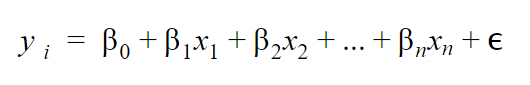

Sendo Yi, a variavel resposta, B0 o intercepto, B1..Bn os coeficientes, X1...Xn as variaves independentes e "e", o erro.

Após os calculos é feito esse gráfico, onde é possivel ver a reta (B0) que melhor se adequa aos pontos.

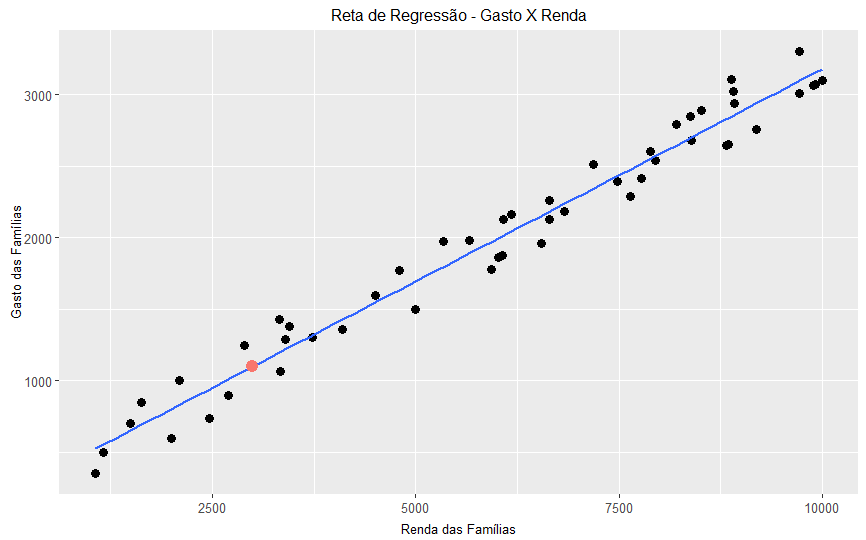

* Equação da atividade do projeto:

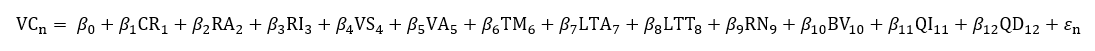

* **Plot do grafico da regressão**

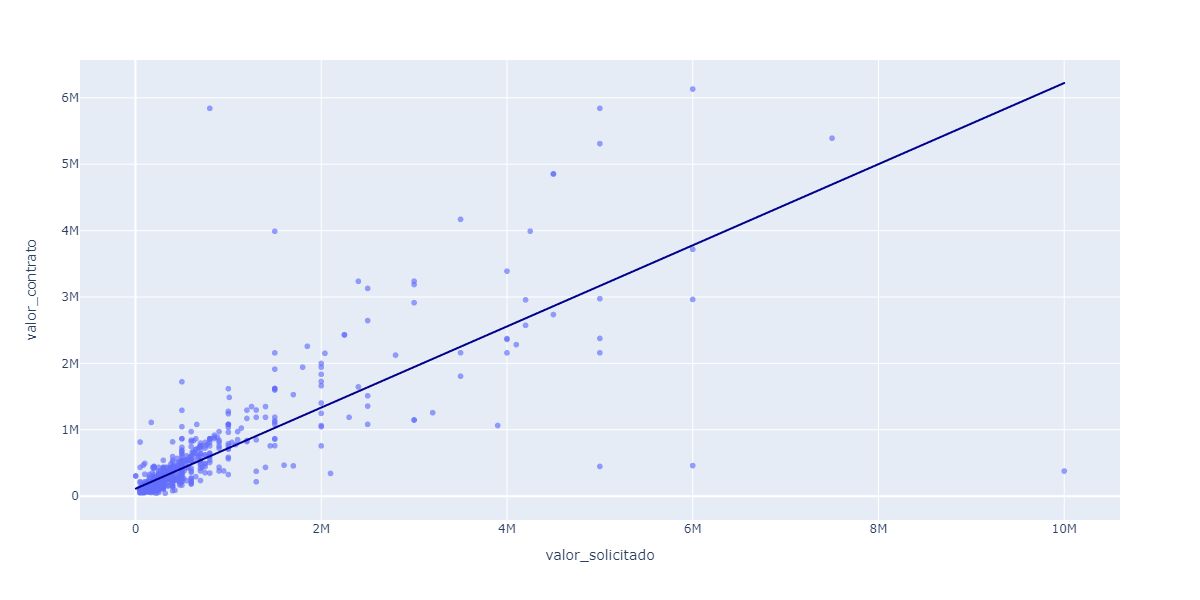

* Preparação da base:

In [145]:
teste = estudo_num
teste = teste.drop(["ID", "Esteira Ajustada", "Sub Esteira Ajustada"], axis=1)

In [146]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135 entries, 0 to 1134
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Valor Contrato                      1134 non-null   float64
 1   Valor Solicitado                    1135 non-null   float64
 2   Diferença Crédito                   1134 non-null   float64
 3   (%) LTV Tomado                      1135 non-null   float64
 4   Score Combinado                     1135 non-null   float64
 5   Taxa ao Mês                         1135 non-null   float64
 6   Taxa ao Ano                         1135 non-null   float64
 7   Comprometimento da Renda (Líquido)  1135 non-null   float64
 8   Comprometimento da Renda            1135 non-null   float64
 9   Prazo                               1135 non-null   float64
 10  Carência (Dias)                     1135 non-null   float64
 11  Renda Apurada                       1135 no

* Recategorizando a feature Aging:

In [147]:
replace_map = {
    "Aging": {np.nan: 0}
               }
teste = teste.replace(replace_map)

In [148]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135 entries, 0 to 1134
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Valor Contrato                      1134 non-null   float64
 1   Valor Solicitado                    1135 non-null   float64
 2   Diferença Crédito                   1134 non-null   float64
 3   (%) LTV Tomado                      1135 non-null   float64
 4   Score Combinado                     1135 non-null   float64
 5   Taxa ao Mês                         1135 non-null   float64
 6   Taxa ao Ano                         1135 non-null   float64
 7   Comprometimento da Renda (Líquido)  1135 non-null   float64
 8   Comprometimento da Renda            1135 non-null   float64
 9   Prazo                               1135 non-null   float64
 10  Carência (Dias)                     1135 non-null   float64
 11  Renda Apurada                       1135 no

* Tirando o dado nulo:

In [ ]:
#testeo = teste.dropna()

* Editando o Titulo das colunas:

In [149]:
teste.columns

Index(['Valor Contrato', 'Valor Solicitado', 'Diferença Crédito',
       '(%) LTV Tomado', 'Score Combinado', 'Taxa ao Mês', 'Taxa ao Ano',
       'Comprometimento da Renda (Líquido)', 'Comprometimento da Renda',
       'Prazo', 'Carência (Dias)', 'Renda Apurada', 'Renda Informada',
       'Renda Necessária', 'Diferença Renda', 'Bacen Prezuizo',
       'Bacen Valor à Vencer', 'Bacen Vencidos', 'Quantidade de Dividas',
       'Quantidade de Imóveis', 'Aging', 'Valor Atraso', 'Saldo a Vencer',
       'Saldo Total Cart. Set.', 'Diferença contrato/imovel', 'Valor do Ativo',
       '% LTV Atual'],
      dtype='object')

In [150]:
teste = teste.rename(columns={'Valor Contrato':'valor_contrato','(%) LTV Tomado':'ltv_tomado',
                              'Score Combinado':'score_combinado','Taxa ao Mês':'taxa_mes',
                              'Taxa ao Ano':'taxa_ano','Comprometimento da Renda (Líquido)':'compr_renda_liq',
                              'Comprometimento da Renda':'compr_renda','Carência (Dias)':'carencia',
                              'Renda Apurada':'renda_apurada','Renda Informada':'renda_informada',
                              'Valor Atraso':'valor_atraso','Saldo a Vencer':'saldo_vencer',
                              'Saldo Total Cart. Set.':'carteira_total_sept', 'Valor do Ativo':'valor_ativo',
                              '% LTV Atual':'ltv_atual', 'Valor Solicitado':'valor_solicitado','Diferença Crédito':'diferença_credito',
                              'Renda Necessária':'renda_necessaria', 'Diferença Renda':'diferença_renda','Bacen Prezuizo': 'bacen_prezuizo',
                              'Bacen Valor à Vencer': 'bacen_valor_vencer', 'Bacen Vencidos': 'bacen_vencidos', 'Quantidade de Dividas': 'quantidade_dividas',
                              'Quantidade de Imóveis': 'quantidade_imoveis', 'Diferença contrato/imovel': 'diferença_contrato_imovel',
                              'Prazo': 'prazo', 'Aging': 'aging'})

In [151]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135 entries, 0 to 1134
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   valor_contrato             1134 non-null   float64
 1   valor_solicitado           1135 non-null   float64
 2   diferença_credito          1134 non-null   float64
 3   ltv_tomado                 1135 non-null   float64
 4   score_combinado            1135 non-null   float64
 5   taxa_mes                   1135 non-null   float64
 6   taxa_ano                   1135 non-null   float64
 7   compr_renda_liq            1135 non-null   float64
 8   compr_renda                1135 non-null   float64
 9   prazo                      1135 non-null   float64
 10  carencia                   1135 non-null   float64
 11  renda_apurada              1135 non-null   float64
 12  renda_informada            1135 non-null   float64
 13  renda_necessaria           1135 non-null   float

* Correlação das features numericas:

Corr não parametrica:

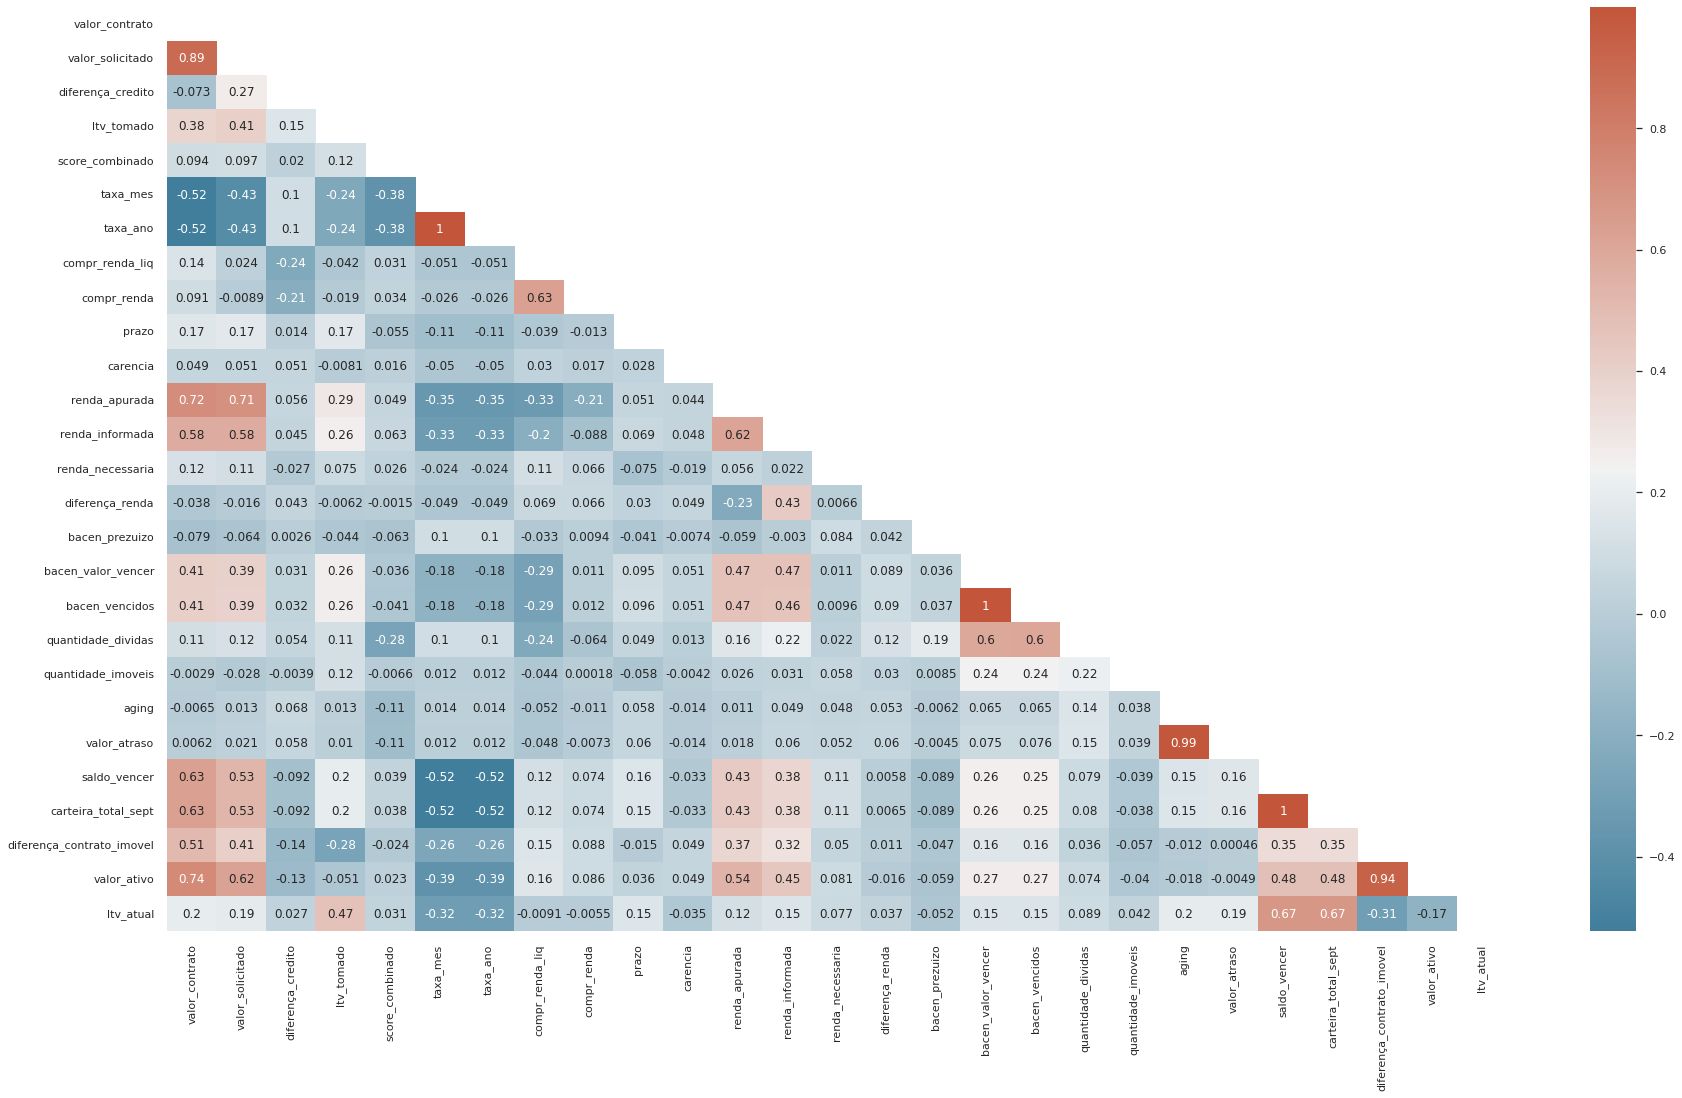

In [152]:
corr = teste.corr("spearman")
f, ax = plt.subplots(figsize=(30, 17))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

Corr parametrica:

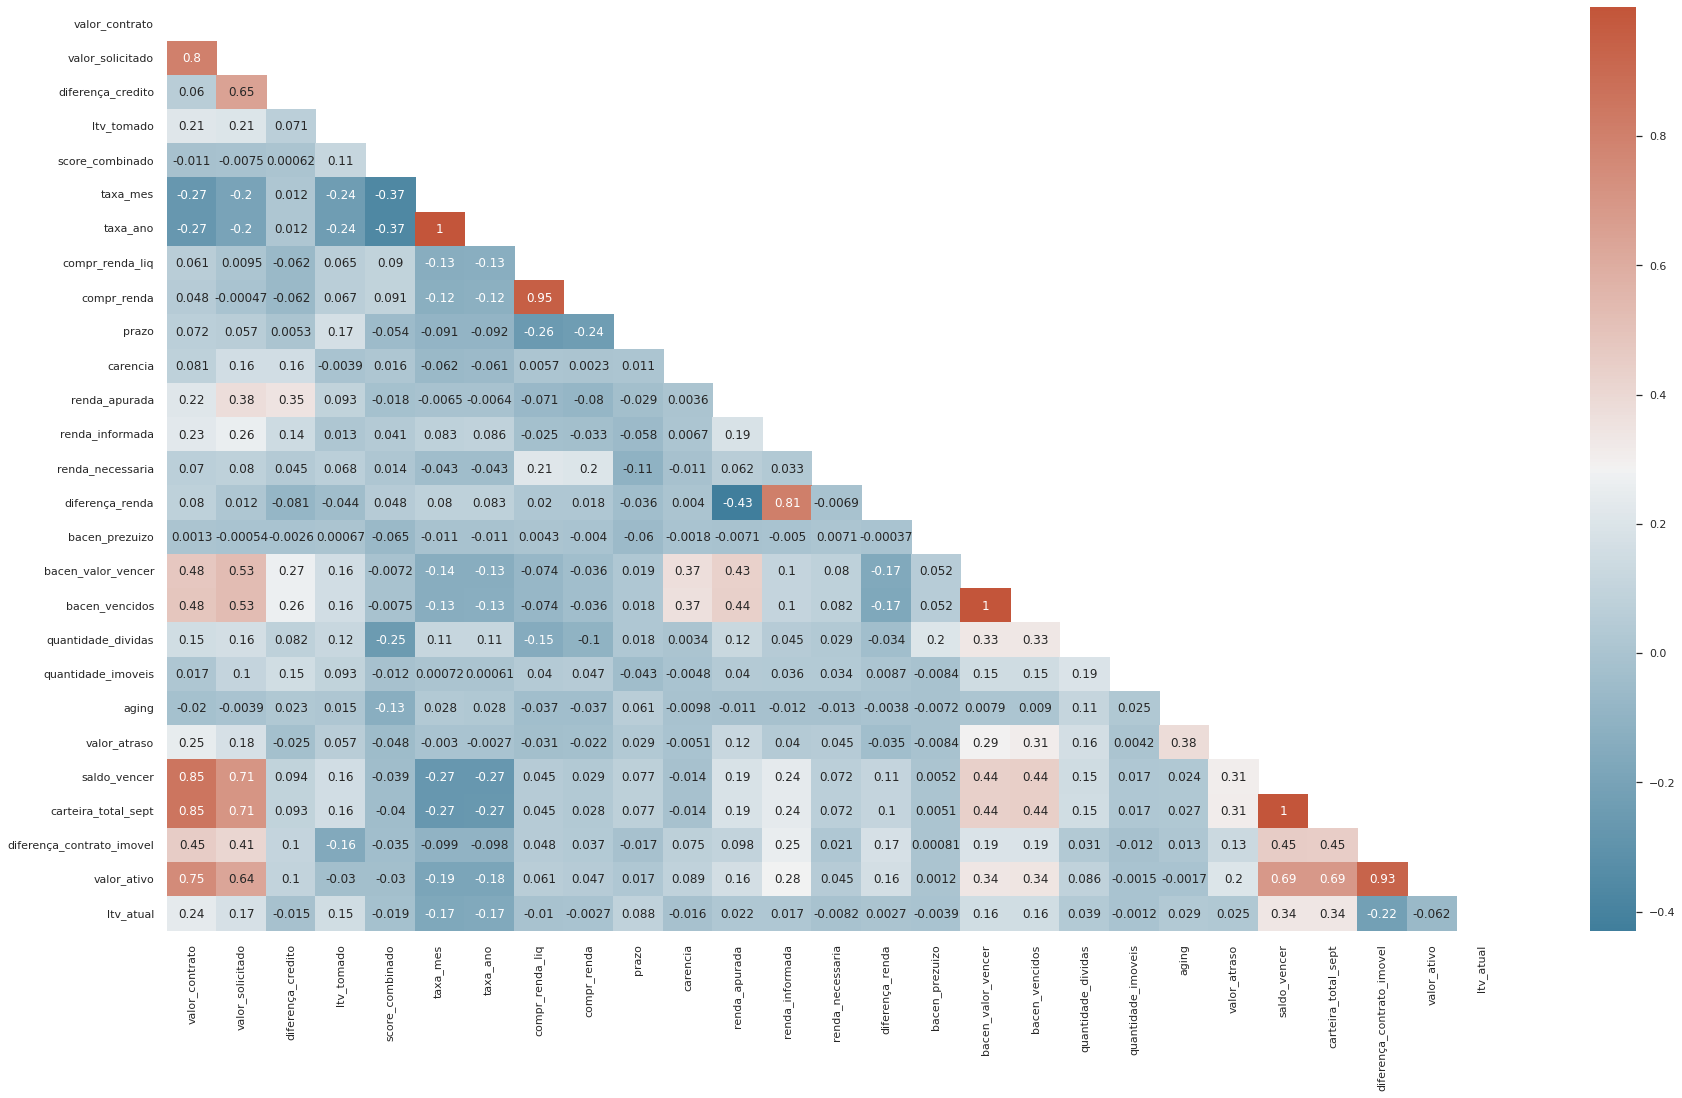

In [153]:
corr = teste.corr()
f, ax = plt.subplots(figsize=(30, 17))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

#### 5.1.1 - Uma modelagem básica de uma regressão linear.

In [154]:
teste.columns

Index(['valor_contrato', 'valor_solicitado', 'diferença_credito', 'ltv_tomado',
       'score_combinado', 'taxa_mes', 'taxa_ano', 'compr_renda_liq',
       'compr_renda', 'prazo', 'carencia', 'renda_apurada', 'renda_informada',
       'renda_necessaria', 'diferença_renda', 'bacen_prezuizo',
       'bacen_valor_vencer', 'bacen_vencidos', 'quantidade_dividas',
       'quantidade_imoveis', 'aging', 'valor_atraso', 'saldo_vencer',
       'carteira_total_sept', 'diferença_contrato_imovel', 'valor_ativo',
       'ltv_atual'],
      dtype='object')

In [155]:
teste["valor_contrato_log"] = np.log(teste["valor_contrato"])

In [ ]:
#teste["renda_apurada_log"] = np.log(teste["renda_apurada"])
#teste["renda_informada_log"] = np.log(teste["renda_informada"])
#teste["carteira_total_sept_log"] = np.log(teste["carteira_total_sept"])
#teste["valor_ativo_log"] = np.log(teste["valor_ativo"])

* Engenharia de features:

In [157]:
teste["compr_renda_liq"] = teste["compr_renda_liq"]*100
teste["taxa_ano"] = teste["taxa_ano"]*100
teste["ltv_atual"] = teste["ltv_atual"]*100
teste["armotizaçao"] = (teste["valor_solicitado"]/teste["prazo"])

* Valor Contrato como Y:

In [206]:
import statsmodels.formula.api as smf

modelo_ls1 = smf.ols(formula='valor_contrato_log ~ compr_renda_liq + renda_apurada + renda_informada + valor_solicitado + valor_ativo + taxa_mes + ltv_atual + ltv_tomado + renda_necessaria + bacen_vencidos + quantidade_imoveis + quantidade_dividas', 
                     data=teste).fit()
print(modelo_ls1.summary())

                            OLS Regression Results                            
Dep. Variable:     valor_contrato_log   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     218.5
Date:                Fri, 09 Dec 2022   Prob (F-statistic):          2.44e-283
Time:                        17:04:24   Log-Likelihood:                -843.98
No. Observations:                1134   AIC:                             1714.
Df Residuals:                    1121   BIC:                             1779.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             12.6060      0

* plot

In [ ]:
fig = sm.graphics.influence_plot(modelo_ls1)
fig.tight_layout(pad=1.0)

* Valor contrato vs Valor solicitado:


In [ ]:
fig = px.scatter(
    teste, x='valor_solicitado', y='valor_contrato', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue', width=1200, 
    height=600)
fig.show()

* Valor Contrato vs Valor Ativo:

In [ ]:
fig = px.scatter(
    teste, x='valor_ativo', y='valor_contrato', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue', width=1200, 
    height=600)
fig.show()

In [205]:
fig = px.scatter(
    teste, x='compr_renda_liq', y='renda_apurada', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue', width=1200, 
    height=600)
fig.show()

* Teste de Multicolinearidade:

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

v = teste[['compr_renda_liq', 'renda_apurada', 'renda_informada', 'valor_solicitado',
           'valor_ativo', 'taxa_mes', 'ltv_atual','ltv_tomado', 'renda_necessaria', 
           'bacen_vencidos', 'quantidade_imoveis', 'quantidade_dividas']]

vif_data = pd.DataFrame()
vif_data["feature"] = v.columns
vif_data["VIF"] = [variance_inflation_factor(v.values, i)
                          for i in range(len(v.columns))]
print(vif_data)

               feature        VIF
0      compr_renda_liq   1.794011
1        renda_apurada   1.384409
2      renda_informada   1.139791
3     valor_solicitado   3.186268
4          valor_ativo   2.683424
5             taxa_mes  10.407090
6            ltv_atual   1.445653
7           ltv_tomado   8.242847
8     renda_necessaria   1.411061
9       bacen_vencidos   1.940075
10  quantidade_imoveis   5.192284
11  quantidade_dividas   4.135590


* Correlação das variaveis explicativas:

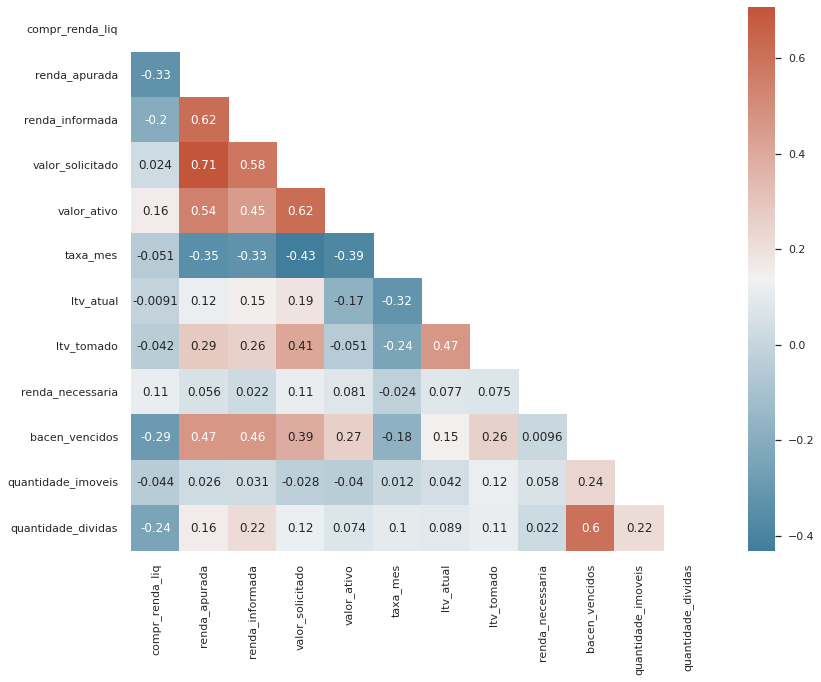

In [ ]:
corr = v.corr("spearman")
f, ax = plt.subplots(figsize=(13, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [ ]:
# valor do ativo / valor solicitado

* qqplot para visualizar a distribuição do modelo de regressão:

Com log:

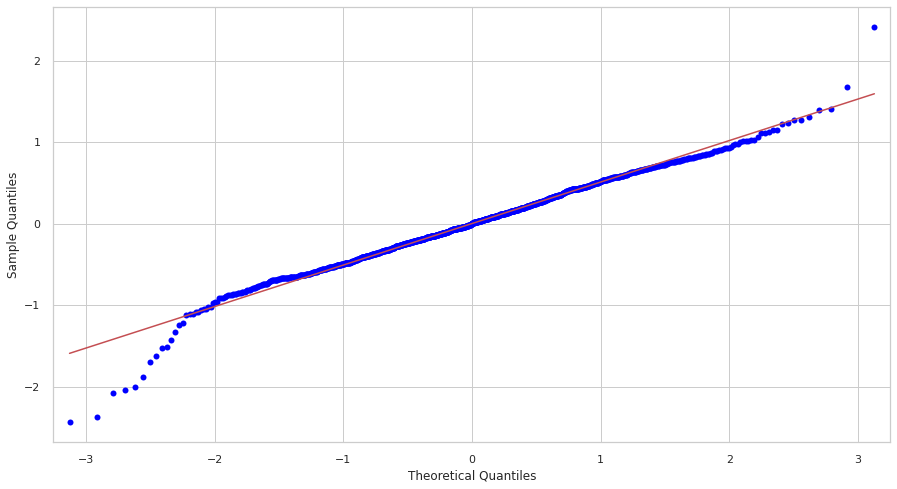

In [209]:
import statsmodels.api as sm

fig = sm.qqplot(modelo_ls1.resid, line="s")
fig.show()

Sem log:

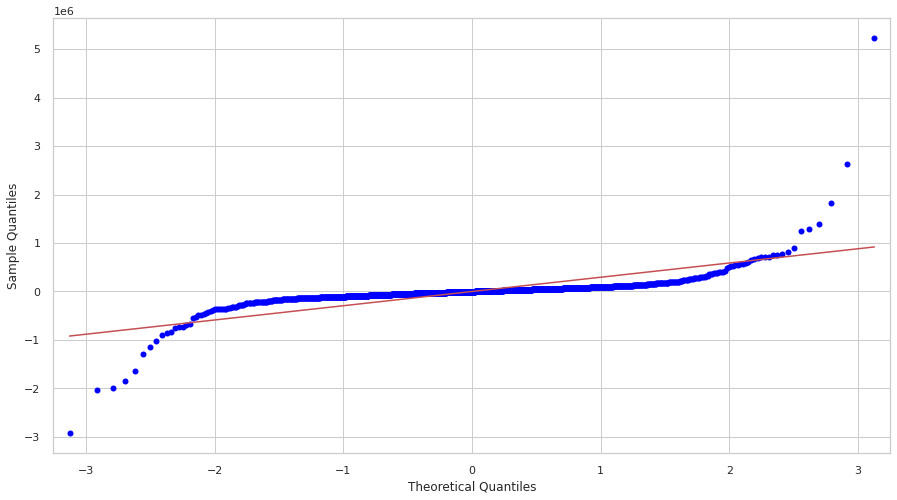

In [ ]:
fig = sm.qqplot(modelo_ls1.resid, line="s")
fig.show()

In [ ]:
#HNP no r

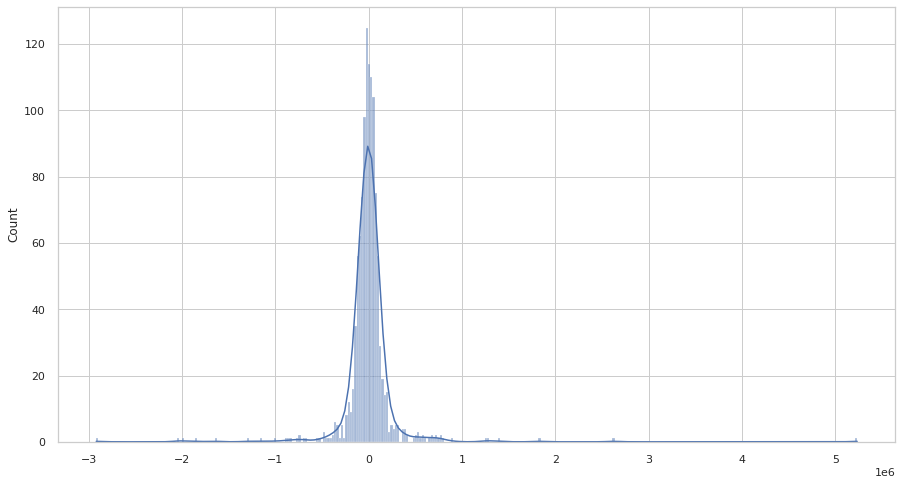

In [ ]:
sns.histplot(modelo_ls1.resid, kde=True)

* Interpretação dos coeficientes (usa quando tiver log):



In [208]:
round((np.exp(modelo_ls1.params[1:]))*100, 6)

compr_renda_liq       100.238312
renda_apurada          99.999998
renda_informada        99.999999
valor_solicitado      100.000034
valor_ativo           100.000023
taxa_mes                0.000000
ltv_atual             100.144224
ltv_tomado            484.416554
renda_necessaria      100.000060
bacen_vencidos        100.000000
quantidade_imoveis     96.945058
quantidade_dividas    101.144492
dtype: float64

#### 5.1.2 - Regressão Linear - Range 200k.

* Puxando a base e aplicando o range de 200:

In [162]:
range = estudinho

In [163]:
range = estudinho.select_dtypes(include=['float64'])

In [167]:
range = range.rename(columns={'Valor Contrato':'valor_contrato','(%) LTV Tomado':'ltv_tomado',
                              'Score Combinado':'score_combinado','Taxa ao Mês':'taxa_mes',
                              'Taxa ao Ano':'taxa_ano','Comprometimento da Renda (Líquido)':'compr_renda_liq',
                              'Comprometimento da Renda':'compr_renda','Carência (Dias)':'carencia',
                              'Renda Apurada':'renda_apurada','Renda Informada':'renda_informada',
                              'Valor Atraso':'valor_atraso','Saldo a Vencer':'saldo_vencer',
                              'Saldo Total Cart. Set.':'carteira_total_sept', 'Valor do Ativo':'valor_ativo',
                              '% LTV Atual':'ltv_atual', 'Valor Solicitado':'valor_solicitado','Diferença Crédito':'diferença_credito',
                              'Renda Necessária':'renda_necessaria', 'Diferença Renda':'diferença_renda','Bacen Prezuizo': 'bacen_prezuizo',
                              'Bacen Valor à Vencer': 'bacen_valor_vencer', 'Bacen Vencidos': 'bacen_vencidos', 'Quantidade de Dividas': 'quantidade_dividas',
                              'Quantidade de Imóveis': 'quantidade_imoveis', 'Diferença contrato/imovel': 'diferença_contrato_imovel',
                              'Prazo': 'prazo', 'Aging': 'aging'})

* Montando a regressão:

In [176]:
range["valor_contrato_log"] = np.log(range["valor_contrato"])

In [204]:
modelo_ls = smf.ols(formula='valor_contrato_log ~ compr_renda_liq + renda_apurada + renda_informada + valor_solicitado + valor_ativo + taxa_mes + ltv_atual + ltv_tomado + renda_necessaria + bacen_vencidos + quantidade_imoveis + quantidade_dividas', 
                     data=range).fit()
print(modelo_ls.summary())

                            OLS Regression Results                            
Dep. Variable:     valor_contrato_log   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     57.26
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           3.44e-87
Time:                        16:39:32   Log-Likelihood:                -30.171
No. Observations:                 536   AIC:                             86.34
Df Residuals:                     523   BIC:                             142.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             11.4835      0

* Resíduos:

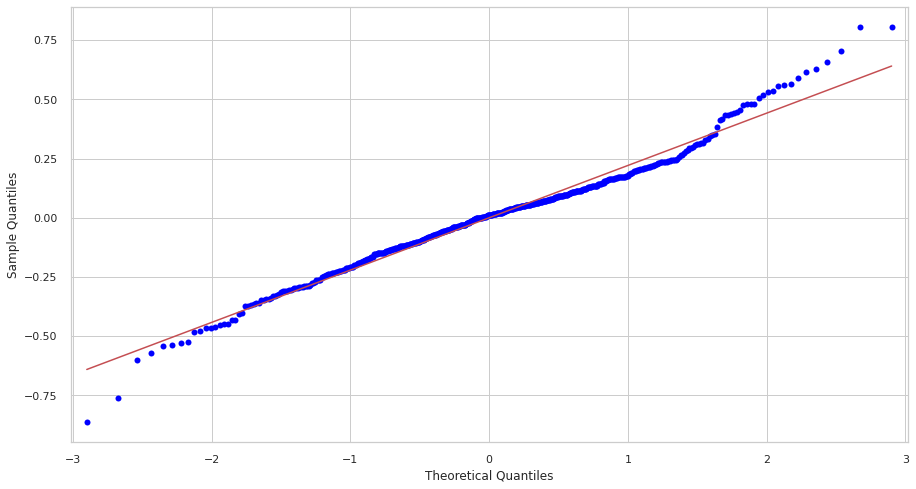

In [198]:
fig = sm.qqplot(modelo_ls.resid, line="s")
fig.show()

* Interpretação dos coeficientes:

In [203]:
round((np.exp(modelo_ls.params[1:]) - 1)*100, 6)

compr_renda_liq        1.462930
renda_apurada          0.000232
renda_informada        0.000102
valor_solicitado       0.000212
valor_ativo            0.000008
taxa_mes             -49.280946
ltv_atual              0.110126
ltv_tomado             0.484654
renda_necessaria       0.000091
bacen_vencidos         0.000170
quantidade_imoveis     5.400318
quantidade_dividas     0.560912
bacen_valor_vencer    -0.000166
dtype: float64

* plot:

In [196]:
px.scatter(
    range, x='compr_renda_liq', y='renda_apurada', opacity=0.65,
    trendline='ols', trendline_color_override='black', width=1200, 
    height=600)

### 5.2 - Modelagem - Previsão.

* Reorganizando o DataBase para melhorar a estrutura:

In [160]:
modelagem = estudo

Colunas a serem excluidas:

* Nº Contrato
* ID
* Data Base Assinatura
* Safra Ano
* Safra Mensal
* Tipo de Carência (?)
* Carência
* Ticket (?)
* Produto
* Produto CRM
* Produto Ajustado
* Data Vencimento
* status Execução
* Situação Execução
* Esteira Ajustada
* Sub Esteira Ajustada
* Faixa de Atraso - Grupos

In [161]:
modelagem.columns

Index(['Nº Contrato (CRM)', 'ID', 'Cliente', 'Produto', 'Valor Contrato',
       'Valor Solicitado', 'Diferença Crédito', 'Data Base Assinatura',
       'Safra Ano', 'Safra Mensal', 'PF | PJ', '(%) LTV Tomado',
       'Score Combinado', 'Taxa ao Mês', 'Taxa ao Ano',
       'Comprometimento da Renda (Líquido)', 'Comprometimento da Renda',
       'Prazo', 'Carência (Dias)', 'Tipo de Carência', 'Motivo do Empréstimo',
       'Modelo de Renda', 'Renda Apurada', 'Renda Informada',
       'Renda Necessária', 'Diferença Renda', 'Ticket', 'Produto CRM',
       'Status Atual', 'Bacen Prezuizo', 'Bacen Valor à Vencer',
       'Bacen Vencidos', 'Quantidade de Dividas', 'Quantidade de Imóveis',
       'Cidade', 'Produto Ajustado', 'Data Vencimento', 'Aging',
       'Faixa Atraso', 'Valor Atraso', 'Saldo a Vencer',
       'Saldo Total Cart. Set.', 'Diferença contrato/imovel', 'Tipo do Ativo',
       'Valor do Ativo', '% LTV Atual', 'Esteira Régua Cob', 'Status Execução',
       'Situação Execução',

In [162]:
modelo = modelagem.drop(["Nº Contrato (CRM)", "ID", "Data Base Assinatura",
                         "Safra Ano","Safra Mensal", "Tipo de Carência", "Ticket",
                         "Produto CRM","Produto Ajustado","Data Vencimento", "Esteira Ajustada",
                         "Sub Esteira Ajustada", "Faixa de Atraso - Grupos", "Cliente", 
                         "Status Execução", "Situação Execução",
                         "Faixa Atraso", "Status Atual", "Valor Atraso","Saldo a Vencer", "Saldo Total Cart. Set.",
                         "Esteira Régua Cob", "Diferença Crédito","Diferença contrato/imovel","% LTV Atual","(%) LTV Tomado",
                         "Taxa ao Ano", "Aging","Prazo","Carência (Dias)", "Taxa ao Mês"], axis=1)

* Renomeando as colunas:

In [163]:
modelo.columns

Index(['Produto', 'Valor Contrato', 'Valor Solicitado', 'PF | PJ',
       'Score Combinado', 'Comprometimento da Renda (Líquido)',
       'Comprometimento da Renda', 'Motivo do Empréstimo', 'Modelo de Renda',
       'Renda Apurada', 'Renda Informada', 'Renda Necessária',
       'Diferença Renda', 'Bacen Prezuizo', 'Bacen Valor à Vencer',
       'Bacen Vencidos', 'Quantidade de Dividas', 'Quantidade de Imóveis',
       'Cidade', 'Tipo do Ativo', 'Valor do Ativo'],
      dtype='object')

In [164]:
modelo = modelo.rename(columns={'Valor Contrato':'valor_contrato','(%) LTV Tomado':'ltv_tomado',
                              'Score Combinado':'score_combinado','Taxa ao Mês':'taxa_mes',
                              'Taxa ao Ano':'taxa_ano','Comprometimento da Renda (Líquido)':'compr_renda_liq',
                              'Comprometimento da Renda':'compr_renda','Carência (Dias)':'carencia',
                              'Renda Apurada':'renda_apurada','Renda Informada':'renda_informada',
                              'Valor Atraso':'valor_atraso','Saldo a Vencer':'saldo_vencer',
                              'Saldo Total Cart. Setembro':'carteira_total_sept', 'Valor do Ativo':'valor_ativo',
                              '% LTV Atual':'ltv_atual','PF | PJ': 'pf_pj','Modelo de Renda':'modelo_renda',
                              'Status Atual':'status_atual','Faixa Atraso':'faixa_atraso','Esteira Régua Cob':'esteira_regua_cob',
                              'Cidade':'cidade', 'Aging': 'aging', 'Valor Solicitado':'valor_solicitado', 'Diferença Crédito':'diferença_credito',
                              'Motivo do Empréstimo':'motivo_emprestimo', 'Bacen Prezuizo':'bacen_prejuizo','Bacen Valor à Vencer': 'bacen_valor_vencer',
                              'Bacen Vencidos':'bacen_vencidos', 'Quantidade de Dividas':'qtd_dividas', 'Quantidade de Imóveis':'qtd_imoveis',
                              'Diferença contrato/imovel':'diferença_ctr_imovel','Tipo do Ativo':'tipo_ativo', 'Prazo':'prazo', 
                              'Renda Necessária':'renda_necessaria','Produto':'produto'})

In [165]:
modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135 entries, 0 to 1134
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   produto             1135 non-null   object 
 1   valor_contrato      1134 non-null   float64
 2   valor_solicitado    1135 non-null   float64
 3   pf_pj               1135 non-null   object 
 4   score_combinado     1135 non-null   float64
 5   compr_renda_liq     1135 non-null   float64
 6   compr_renda         1135 non-null   float64
 7   motivo_emprestimo   749 non-null    object 
 8   modelo_renda        1135 non-null   object 
 9   renda_apurada       1135 non-null   float64
 10  renda_informada     1135 non-null   float64
 11  renda_necessaria    1135 non-null   float64
 12  Diferença Renda     1135 non-null   float64
 13  bacen_prejuizo      1135 non-null   float64
 14  bacen_valor_vencer  1135 non-null   float64
 15  bacen_vencidos      1135 non-null   float64
 16  qtd_di

In [166]:
modelo.isnull().mean()*100

produto                0.000000
valor_contrato         0.088106
valor_solicitado       0.000000
pf_pj                  0.000000
score_combinado        0.000000
compr_renda_liq        0.000000
compr_renda            0.000000
motivo_emprestimo     34.008811
modelo_renda           0.000000
renda_apurada          0.000000
renda_informada        0.000000
renda_necessaria       0.000000
Diferença Renda        0.000000
bacen_prejuizo         0.000000
bacen_valor_vencer     0.000000
bacen_vencidos         0.000000
qtd_dividas            0.000000
qtd_imoveis            0.000000
cidade                 0.000000
tipo_ativo             0.000000
valor_ativo            0.000000
dtype: float64

* Imputando a média em linhas com np.nun:

In [167]:
media = modelo["valor_contrato"].mean()
media_two = modelo["valor_solicitado"].mean()
#media_three = modelo["diferença_credito"].mean()
#media_four = modelo["diferença_ctr_imovel"].mean()

In [168]:
modelo["valor_contrato"] = modelo["valor_contrato"].fillna(media)
#modelo["diferença_credito"] = modelo["diferença_credito"].fillna(media_three)
modelo["valor_solicitado"] = modelo["valor_solicitado"].fillna(media_two)
#modelo["diferença_ctr_imovel"] = modelo["diferença_ctr_imovel"].fillna(media_four)

In [169]:
modelo.isnull().mean()*100

produto                0.000000
valor_contrato         0.000000
valor_solicitado       0.000000
pf_pj                  0.000000
score_combinado        0.000000
compr_renda_liq        0.000000
compr_renda            0.000000
motivo_emprestimo     34.008811
modelo_renda           0.000000
renda_apurada          0.000000
renda_informada        0.000000
renda_necessaria       0.000000
Diferença Renda        0.000000
bacen_prejuizo         0.000000
bacen_valor_vencer     0.000000
bacen_vencidos         0.000000
qtd_dividas            0.000000
qtd_imoveis            0.000000
cidade                 0.000000
tipo_ativo             0.000000
valor_ativo            0.000000
dtype: float64

* Feature Engenharia:

In [170]:
#modelo["ltv_tomado"] = modelo["ltv_tomado"]*100
#modelo["taxa_mes"] = modelo["taxa_mes"]*100
#modelo["taxa_ano"] = modelo["taxa_ano"]*100
modelo["compr_renda_liq"] = modelo["compr_renda_liq"]*100
modelo["compr_renda"] = modelo["compr_renda"]*100
#modelo["ltv_atual"] = modelo["ltv_atual"]*100

* Separando as features categoricas das numericas:

Categorico:

In [171]:
cat_features = modelo.select_dtypes(exclude=['int', 'float']).columns.tolist()

Numerico:

In [172]:
num_features = modelo.select_dtypes(include=['int', 'float']).columns.tolist()
num_features.remove('valor_contrato')

### 5.2.1 - Treino, Teste, Validação e Pre Processamento:

* Separando em X (Variaveis explicativas) e y (variavel a ser prevista):

In [173]:
y = np.log(modelo['valor_contrato']) #<-- Variavel Resposta!
X = modelo.drop('valor_contrato', axis=1) #<-- Variaveis Explicativas!

In [174]:
X.columns

Index(['produto', 'valor_solicitado', 'pf_pj', 'score_combinado',
       'compr_renda_liq', 'compr_renda', 'motivo_emprestimo', 'modelo_renda',
       'renda_apurada', 'renda_informada', 'renda_necessaria',
       'Diferença Renda', 'bacen_prejuizo', 'bacen_valor_vencer',
       'bacen_vencidos', 'qtd_dividas', 'qtd_imoveis', 'cidade', 'tipo_ativo',
       'valor_ativo'],
      dtype='object')

In [175]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, train_size=0.5, test_size=0.5, random_state=42) #<---

print(f'X Train:', X_train.shape)
print("----")
print(f'X Val:', X_val.shape)
print("----")
print(f'X Test:', X_test.shape)

X Train: (794, 20)
----
X Val: (170, 20)
----
X Test: (171, 20)


* Pré processamento:

obs: re

In [176]:
def random_forest_preprocessing(X_train, X_val, X_test, y_train):

  cat_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
  X_train[cat_features] = cat_imputer.fit_transform(X_train[cat_features])
  X_val[cat_features] = cat_imputer.transform(X_val[cat_features])
  X_test[cat_features] = cat_imputer.transform(X_test[cat_features])

  cat_imputer = SimpleImputer(missing_values=None, strategy='most_frequent')
  X_train[cat_features] = cat_imputer.fit_transform(X_train[cat_features])
  X_val[cat_features] = cat_imputer.transform(X_val[cat_features])
  X_test[cat_features] = cat_imputer.transform(X_test[cat_features])

  target_encoder = TargetEncoder()
  X_train[cat_features] = target_encoder.fit_transform(X_train[cat_features], y_train)
  X_val[cat_features] = target_encoder.transform(X_val[cat_features])
  X_test[cat_features] = target_encoder.transform(X_test[cat_features])

  num_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
  X_train[num_features] = num_imputer.fit_transform(X_train[num_features])
  X_val[num_features] = num_imputer.transform(X_val[num_features])
  X_test[num_features] = num_imputer.transform(X_test[num_features])

  return X_train, X_val, X_test

X_train, X_val, X_test = random_forest_preprocessing(X_train.copy(), X_val.copy(), X_test.copy(), y_train)

In [177]:
X_test[cat_features]

produto     pf_pj  motivo_emprestimo  modelo_renda     cidade  \
572   12.176531  12.27821          12.385224     12.734328  11.866640   
798   12.176531  12.27821          12.283580     12.734328  12.772018   
1005  12.176531  12.27821          12.396521     12.239341  11.850896   
888   12.176531  12.27821          12.283580     12.734328  11.641955   
430   12.176531  12.27821          12.283580     12.135444  12.360753   
...         ...       ...                ...           ...        ...   
939   12.176531  12.27821          12.731222     12.734328  12.360753   
670   12.176531  12.27821          12.283580     11.868815  12.557963   
872   12.176531  12.27821          12.283580     12.734328  11.895989   
538   12.176531  12.27821          12.283580     12.452933  12.360753   
760   12.176531  12.27821          12.283580     12.452933  12.194990   

      tipo_ativo  
572    12.364121  
798    12.364121  
1005   12.289512  
888    12.289512  
430    12.289512  
...          ...  
939    12.289512  
670    12.395726  
872    12.289512  
538    12.289512  
760    12.364121  

[171 rows x 6 columns]

#### 5.2.1.1 - Processo: Standard Scaler.

In [ ]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
X_train

### 5.2.2 - Treinando um Modelo Random Forest Regressor.

In [178]:
def metrics_report(y, y_pred, dataset_name='valid'):
  mean_y = np.mean(y)
  mean_pred = np.mean(y_pred)

  rmse = round(math.sqrt(mean_squared_error(y, y_pred)), 2)
  mae = mean_absolute_error(y, y_pred)
  r2 = r2_score(y, y_pred)
  mape = mean_absolute_percentage_error(y, y_pred)
  
  report = pd.DataFrame({
    'metric': ['RMSE', 'MAE', 'R^2', 'MAPE', 'Avg. target', 'Avg. Prediction'],
    dataset_name: [rmse, mae, r2, mape, mean_y, mean_pred]
  })

  report[dataset_name] = report[dataset_name]
  return report

In [179]:
rf_baseline = RandomForestRegressor(random_state=42)
rf_baseline.fit(X_train, y_train)

y_val_baseline_pred = rf_baseline.predict(X_val)
baseline_report = metrics_report(y_val, y_val_baseline_pred, 'validation')
baseline_report

metric  validation
0             RMSE    0.250000
1              MAE    0.182497
2              R^2    0.937070
3             MAPE    0.014756
4      Avg. target   12.388457
5  Avg. Prediction   12.413853

In [180]:
print('--')
print(f'Training Score: {rf_baseline.score(X_train, y_train)}')
print(f'Test Score: {rf_baseline.score(X_test, y_test)}')
print(f'Validation: {rf_baseline.score(X_val, y_val)}')
print('--')

--
Training Score: 0.9832215311719743
Test Score: 0.8779070537040243
Validation: 0.9370701334666603
--


* Realizando uma validação cruzada:

In [181]:
scores = cross_val_score(rf_baseline, X_train, y_train, cv=10, scoring='r2')
print('----')
print('Cross Validation Score: ' + str(np.mean(scores))[0:6])
print('----')

----
Cross Validation Score: 0.8710
----


* Plot da validação cruzada:

In [200]:
from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import validation_curve

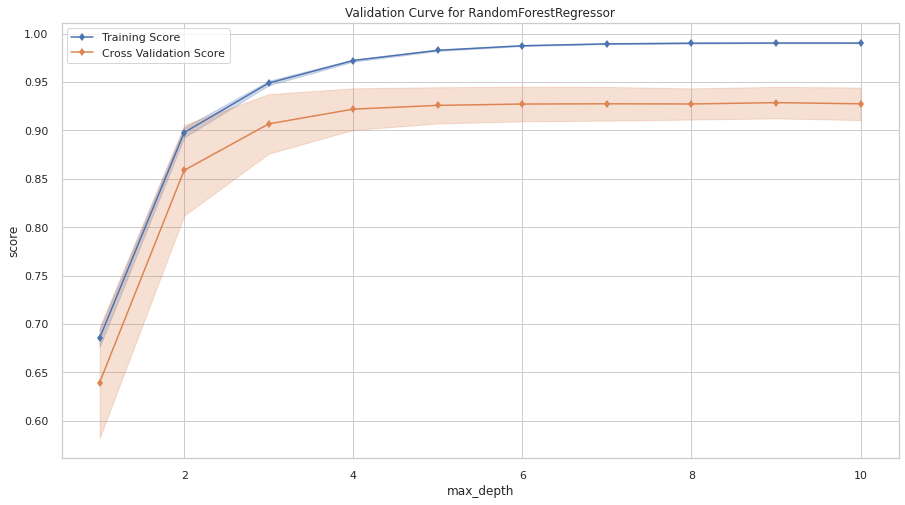

In [ ]:
viz = validation_curve(
    RandomForestRegressor(random_state=42),  X_val, y_val, param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="r2"
)

#### 5.2.4 - Encontrando os melhores Hyperparametros para o Random Forest Regressor.

* n_estimators ideal é 150.

In [182]:
for n_estimators in [10, 30, 50, 70, 100, 150, 200]:

  print(f'Random forest, with n_estimators {n_estimators}')
  
  rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
  rf_model.fit(X_train, y_train)
  y_val_pred = rf_model.predict(X_val)
  rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))

  print(f'rmse: {rmse}\n')

Random forest, with n_estimators 10
rmse: 0.2571793502583037

Random forest, with n_estimators 30
rmse: 0.24904210789230993

Random forest, with n_estimators 50
rmse: 0.2517243286289367

Random forest, with n_estimators 70
rmse: 0.2515089691391243

Random forest, with n_estimators 100
rmse: 0.24961352180208426

Random forest, with n_estimators 150
rmse: 0.24796893255910463

Random forest, with n_estimators 200
rmse: 0.2480629725842699



* max_features ideal é 10.

In [183]:
for max_features in ['sqrt', 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 10]:

  print(f'Random forest, with max_features {max_features}')

  rf_model = RandomForestRegressor(n_estimators=150, max_features=max_features, random_state=42)
  rf_model.fit(X_train, y_train)
  y_val_pred = rf_model.predict(X_val)
  rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))

  print(f'rmse: {rmse}\n')

Random forest, with max_features sqrt
rmse: 0.28017341185808387

Random forest, with max_features 0.1
rmse: 0.3404425724857361

Random forest, with max_features 0.2
rmse: 0.28017341185808387

Random forest, with max_features 0.3
rmse: 0.2611762437657646

Random forest, with max_features 0.4
rmse: 0.24951781245000354

Random forest, with max_features 0.6
rmse: 0.2417995872504943

Random forest, with max_features 0.7
rmse: 0.24069323970481415

Random forest, with max_features 0.8
rmse: 0.2425998523924428

Random forest, with max_features 0.9
rmse: 0.24665550756240287

Random forest, with max_features 10
rmse: 0.23974778959258955



* min_samples_leaf ideal é 3.

In [184]:
for min_samples_leaf in list(range(1,6)):

  print(f'Random forest, with min_samples_leaf {min_samples_leaf}')

  rf_model = RandomForestRegressor(n_estimators=150, max_features=10, 
                                   min_samples_leaf= min_samples_leaf, 
                                   random_state=42)
  rf_model.fit(X_train, y_train)
  y_val_pred = rf_model.predict(X_val)
  rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))
  
  print(f'rmse: {rmse}\n')

Random forest, with min_samples_leaf 1
rmse: 0.23974778959258955

Random forest, with min_samples_leaf 2
rmse: 0.24588869856618376

Random forest, with min_samples_leaf 3
rmse: 0.24539447946740436

Random forest, with min_samples_leaf 4
rmse: 0.2494927176451575

Random forest, with min_samples_leaf 5
rmse: 0.24941951990068995



In [185]:
for max_depth in list(range(1,10)):

  print(f'Random forest, with max_depth {max_depth}')

  rf_model = RandomForestRegressor(n_estimators=150, max_features=10, 
                                   min_samples_leaf=1, random_state=42, max_depth=max_depth)
  rf_model.fit(X_train, y_train)
  y_val_pred = rf_model.predict(X_val)
  rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))
  
  print(f'rmse: {rmse}\n')

Random forest, with max_depth 1
rmse: 0.6079269891845539

Random forest, with max_depth 2
rmse: 0.4155629195240675

Random forest, with max_depth 3
rmse: 0.3305157504708799

Random forest, with max_depth 4
rmse: 0.2841305262122898

Random forest, with max_depth 5
rmse: 0.26357541828368375

Random forest, with max_depth 6
rmse: 0.25690912344667716

Random forest, with max_depth 7
rmse: 0.25415555474641677

Random forest, with max_depth 8
rmse: 0.24504092629391971

Random forest, with max_depth 9
rmse: 0.24964186927110743



#### GrindCV

* RandomizedSearchCV:

In [8]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


* GridSearchCV:

In [ ]:
rdf = RandomForestRegressor(random_state=42)

parameters = {'bootstrap': [True, False],
              'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
              'max_features': ['auto', 'sqrt','log2'],
              'min_samples_leaf': [1, 2, 3, 4, 5, 6],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [10, 30, 50, 70, 100, 150, 200],
              'criterion': ['squared_error', 'absolute_error','poisson'],
              'min_samples_split': [2],
              'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4],
              'max_leaf_nodes': [None],
              'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4],
              'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4]}

rdf_grid = GridSearchCV(rdf,
                        parameters,
                        cv=10,
                        n_jobs=5,
                        verbose=True)
rdf_grid.fit(X_train, y_train)

print(rdf_grid.best_score_)
print(rdf_grid.best_params_)

In [ ]:
rdf = RandomForestRegressor(random_state=42)

parameters = {
              'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 3, 4, 5, 6],
              'n_estimators': [10, 30, 50, 70, 100, 150],
              'criterion': ['squared_error', 'absolute_error'],
              'min_impurity_decrease': [0.0, 0.1, 0.2]
              }

rdf_grid = GridSearchCV(rdf,
                        parameters,
                        cv=10,
                        n_jobs=5,
                        verbose=True)
rdf_grid.fit(X_train, y_train)

print(rdf_grid.best_score_)
print(rdf_grid.best_params_)

Fitting 10 folds for each of 4752 candidates, totalling 47520 fits


### 3.2.3 - Treinando um Modelo LGBM Regressor.

In [ ]:
lgbm_baseline = LGBMRegressor(random_state=42, num_leaves=52, subsample=0.5, n_estimators=713)
lgbm_baseline.fit(X_train, y_train)

y_val_baseline_pred = lgbm_baseline.predict(X_val)
baseline_report = metrics_report(y_val, y_val_baseline_pred, 'validation')
baseline_report

metric  validation
0             RMSE    0.260000
1              MAE    0.199273
2              R^2    0.932821
3             MAPE    0.016076
4      Avg. target   12.388457
5  Avg. Prediction   12.411716

In [ ]:
print('----')
print(f'Training Score: {lgbm_baseline.score(X_train, y_train)}')
print(f'Test Score: {lgbm_baseline.score(X_test, y_test)}')
print(f'Validation: {lgbm_baseline.score(X_val, y_val)}')
print('----')

----
Training Score: 0.999954568535972
Test Score: 0.9106955836804732
Validation: 0.932820562076616
----


In [ ]:
scores = cross_val_score(lgbm_baseline, X_train, y_train, cv=10, scoring='r2')
print('----')
print('Cross Validarion Score: ' + str(np.mean(scores))[0:6])
print('----')

----
Cross Validarion Score: 0.8898
----


* Plot da validação cruzada:

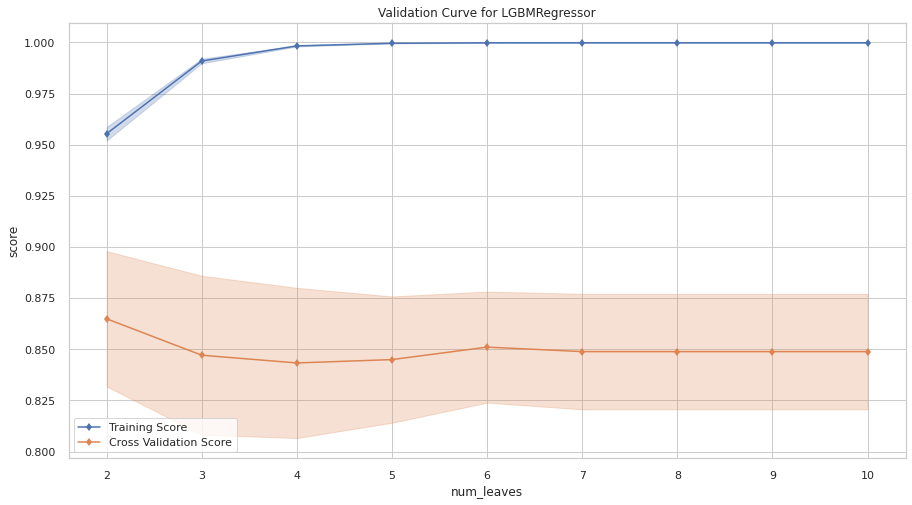

In [ ]:
viz = validation_curve(
    lgbm_baseline,  X_val, y_val, param_name="num_leaves",
    param_range=np.arange(1, 11), cv=10, scoring="r2"
)

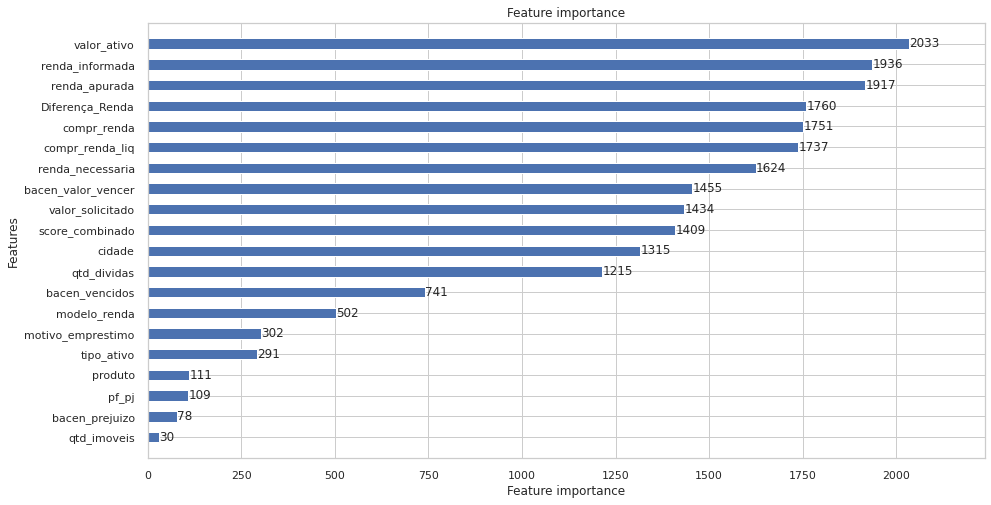

In [ ]:
import lightgbm as lgb

lgb.plot_importance(lgbm_baseline, height=.5)

#### 5.2.3.1 - Encontrando os melhores Hyperparametros para o LGBM Regressor.

In [ ]:
pip install verstack

In [ ]:
from verstack import LGBMTuner

test = X_test

tuner = LGBMTuner(metric = 'mse') # <- the only required argument
tuner.fit(X_train, y_train)

pred = tuner.predict(teste)

* Testando novos parametros com GridSearchCV:

In [ ]:
param_grid = {
'learning_rate':[.1,.15,.2,.25],
'n_estimators':[10,100,150,200],
'num_leaves':[20,220,260,300]
}

In [ ]:
lgbm_regressor_two = GridSearchCV(LGBMRegressor(), param_grid=param_grid,
                   scoring='neg_mean_absolute_error', verbose=True, n_jobs=8)

lgbm_regressor_two.fit(X_train, y_train)
#lgbm_regressor_two.best_params_

print(lgbm_regressor_two.best_score_)
print(lgbm_regressor_two.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
-0.2088672795250083
{'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 220}


##### 5.2.3.1.1 - Treinando LGBM com os melhores Hyperparametros.

In [ ]:
lgbm_baseline_o = LGBMRegressor(learning_rate=0.1, n_estimators= 100, num_leaves=220, objective='regression')
lgbm_baseline_o.fit(X_train, y_train)

y_val_baseline_pred = lgbm_baseline_o.predict(X_val)
baseline_report = metrics_report(y_val, y_val_baseline_pred, 'validation')
baseline_report

metric  validation
0             RMSE      0.2600
1              MAE      0.1984
2              R^2      0.9341
3             MAPE      0.0160
4      Avg. target     12.3885
5  Avg. Prediction     12.4086

In [ ]:
print('----')
print(f'Training Score: {lgbm_baseline_o.score(X_train, y_train)}')
print(f'Test Score: {lgbm_baseline_o.score(X_test, y_test)}')
#print(f'Validation: {lgbm_baseline_o.score(X_val, y_val)}')
print('----')

----
Training Score: 0.9906687395188816
Test Score: 0.910809084289836
----


* Validação Cruzada:

In [ ]:
scores = cross_val_score(lgbm_baseline_o, X_train, y_train, cv=10, scoring='r2')
print('----')
print('Cross Validarion Score: ' + str(np.mean(scores))[0:6])
print('----')

----
Cross Validarion Score: 0.8940
----


### 5.2.4 - Treinando um Modelo XGB Regressor.

In [ ]:
knn_baseline = XGBRegressor(random_state=42, objective = 'reg:squarederror')
knn_baseline.fit(X_train, y_train)

y_val_baseline_pred = knn_baseline.predict(X_val)
baseline_report = metrics_report(y_val, y_val_baseline_pred, 'validation')
baseline_report

metric  validation
0             RMSE    0.290000
1              MAE    0.225206
2              R^2    0.916531
3             MAPE    0.018150
4      Avg. target   12.388457
5  Avg. Prediction   12.412245

In [ ]:
print(f'Training Score: {knn_baseline.score(X_train, y_train)}')
print(f'Test Score: {knn_baseline.score(X_test, y_test)}')
print(f'Validation: {knn_baseline.score(X_val, y_val)}')
print('--')

Training Score: 0.9576679776187977
Test Score: 0.8935266123032731
Validation: 0.9165314640082635
--


In [ ]:
scores = cross_val_score(knn_baseline, X_val, y_val, cv=10, scoring='r2')
print('----')
print('Cross Validarion Score: ' + str(np.mean(scores))[0:6])
print('----')

----
Cross Validarion Score: 0.9212
----


* Plot da validação cruzada:

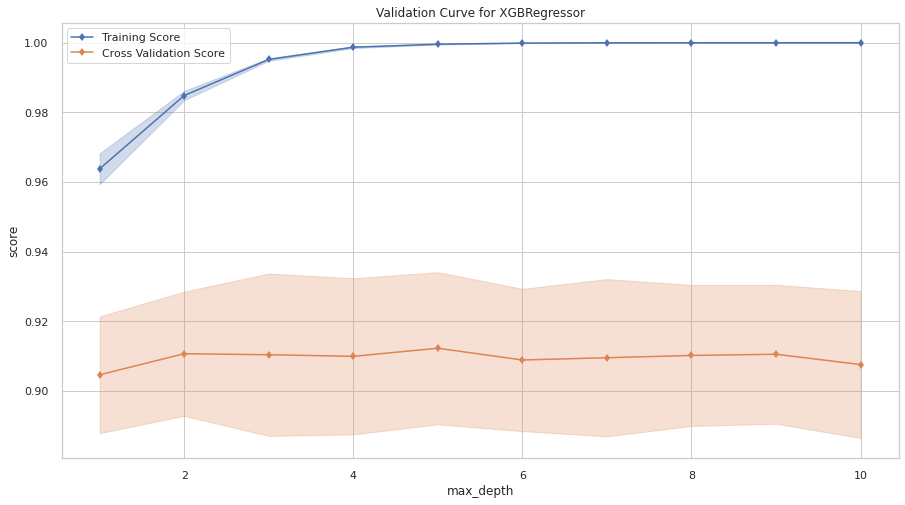

In [ ]:
viz = validation_curve(knn_baseline, X_val, y_val, param_name="max_depth",
      param_range=np.arange(1, 11), cv=10, scoring="r2")

#### 5.2.4.1 - Encontando os melhores Hyperparametros para o XGB Regressor.

* Encontrando os melhores parametros:

In [ ]:
xgb1 = XGBRegressor(random_state=42)

parameters = {'nthread':[4],
              'objective':['reg:linear'],
              'learning_rate': [0.03, 0.05, .07, 0.10, 0.15, 0.2],
              'max_depth': [1, 3, 5, 6, 7, 8],
              'min_child_weight': [1, 3, 4, 5, 7, 8],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500, 1000]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv=10,
                        n_jobs=5,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
0.8965869417026576
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 1000, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


* Treinando com os melhores parametros:

In [ ]:
knn_baseline_two = XGBRegressor(colsample_bytree=0.7, learning_rate=0.05, 
                                max_depth=3, min_child_weight=5, 
                                n_estimators=1000, nthread=4, 
                                objective='reg:linear', silent=1, 
                                subsample=0.7, random_state=42)

knn_baseline_two.fit(X_train, y_train)

y_val_baseline_pred = knn_baseline_two.predict(X_val)
baseline_report = metrics_report(y_val, y_val_baseline_pred, 'validation')
baseline_report

metric  validation
0             RMSE    0.270000
1              MAE    0.216144
2              R^2    0.923968
3             MAPE    0.017412
4      Avg. target   12.388457
5  Avg. Prediction   12.416567

* Plot da validação cruzada:

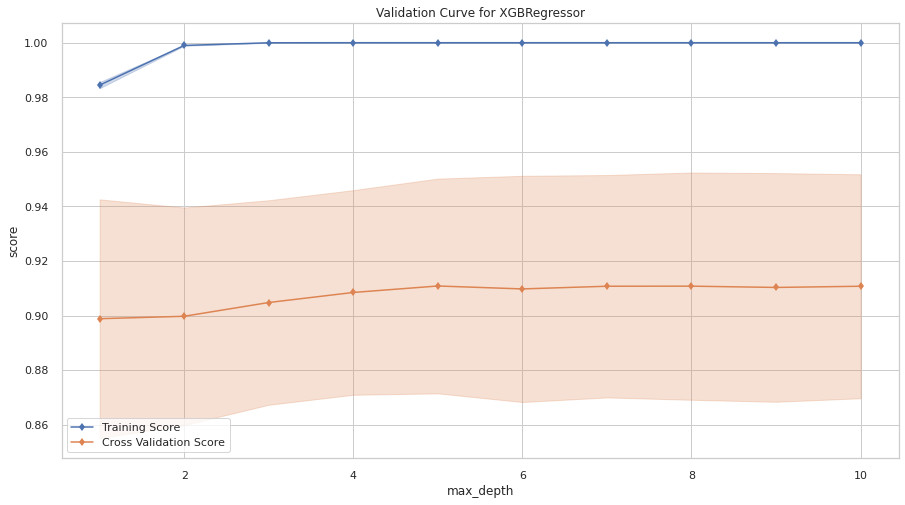

In [ ]:
viz = validation_curve(knn_baseline_two, X_val, y_val, param_name="max_depth",
      param_range=np.arange(1, 11), cv=10, scoring="r2")

In [ ]:
model = XGBRegressor(colsample_bytree=0.7, learning_rate=0.05, 
                                max_depth=3, min_child_weight=5, 
                                n_estimators=1000, nthread=4, 
                                objective='reg:linear', silent=1, 
                                subsample=0.7, random_state=42)
viz = FeatureImportances(model, relative=False)
viz.fit(X_train, y_train)
viz.show()

In [ ]:
viz = FeatureImportances(model, relative=False)
viz.fit(X_train, y_train)
viz.show()

### 5.2.6 - Treinando o Modelo com os Melhores Hyperparametros - RandomForestRegressor.

In [198]:
rf_model_t = RandomForestRegressor(criterion='absolute_error', max_depth=None, 
                                 max_features='sqrt', min_samples_leaf= 1, 
                                 n_estimators=100, random_state=42)

rf_model_t.fit(X_train, y_train)
y_val_pred = rf_model_t.predict(X_val)
metrics_report(y_val, y_val_pred, 'validation')

metric  validation
0             RMSE    0.280000
1              MAE    0.217521
2              R^2    0.918675
3             MAPE    0.017472
4      Avg. target   12.388457
5  Avg. Prediction   12.366263

In [197]:
rf_model = RandomForestRegressor(n_estimators=150, max_features=10, 
                                 min_samples_leaf=1, criterion='squared_error', 
                                 random_state=42,max_depth=8)

rf_model.fit(X_train, y_train)
y_val_pred = rf_model.predict(X_val)
metrics_report(y_val, y_val_pred, 'validation')

metric  validation
0             RMSE    0.250000
1              MAE    0.188534
2              R^2    0.939355
3             MAPE    0.015261
4      Avg. target   12.388457
5  Avg. Prediction   12.400659

* Score do fit:

In [202]:
print(f'Training Score: {rf_model_t.score(X_train, y_train).round(5)*100}')
print(f'Test Score: {rf_model_t.score(X_test, y_test).round(4)*100}')
print(f'Validação Score: {rf_model_t.score(X_val, y_val).round(5)*100}')
print('--')

Training Score: 98.187
Test Score: 88.05
Validação Score: 91.86800000000001
--


* Validação Cruzada:

In [206]:
scores = cross_val_score(rf_model_t, X_train, y_train, cv=10, scoring='r2')
print('----')
print('Cross Validarion Score: ' + str(np.mean(scores))[0:6])
print('----')

----
Cross Validarion Score: 0.8748
----


* Plot da validação cruzada:

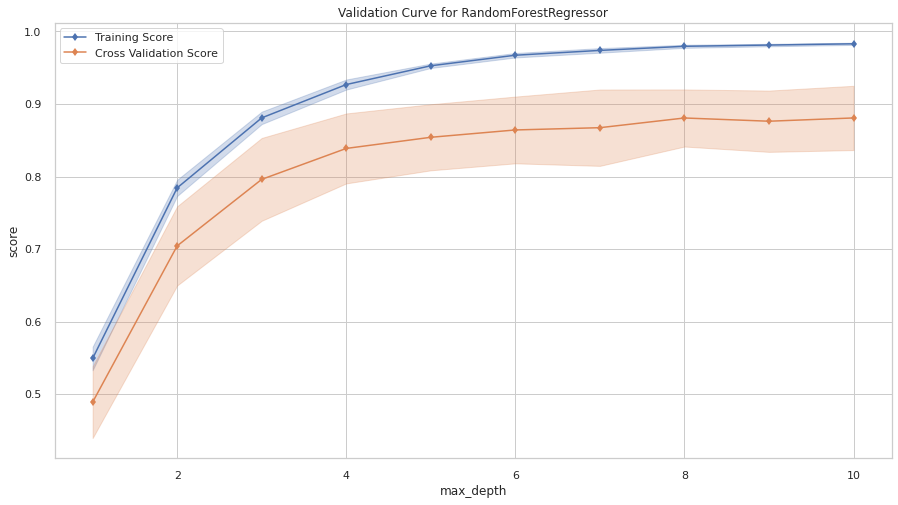

In [204]:
viz = validation_curve(rf_model_t,  X_val, y_val, 
                                 param_name="max_depth",
                                 param_range=np.arange(1, 11), cv=8, scoring="r2")

### 5.2.7 - MAE dos Modelos.

In [ ]:
 modelos_candidatos = {
    "LGBM Regressor" : LGBMRegressor(learning_rate=0.1, n_estimators= 100, num_leaves=220, objective='regression'),
    "XGB Regressor" : XGBRegressor(colsample_bytree=0.7, learning_rate=0.05, 
                                max_depth=3, min_child_weight=5, 
                                n_estimators=1000, nthread=4, 
                                objective='reg:linear', silent=1, 
                                subsample=0.7, random_state=42),
    "Random Forest Regressor" : RandomForestRegressor(n_estimators=150, max_features=10, 
                                 min_samples_leaf=3, criterion='squared_error', 
                                 random_state=42)
}

avaliacao = {}
for nome,model in modelos_candidatos.items():

    score = cross_val_score(model,
                            X_train, y_train,  
                            scoring='neg_mean_absolute_error',
                           n_jobs=8 
                           ).mean() 
    avaliacao[nome] = -score 

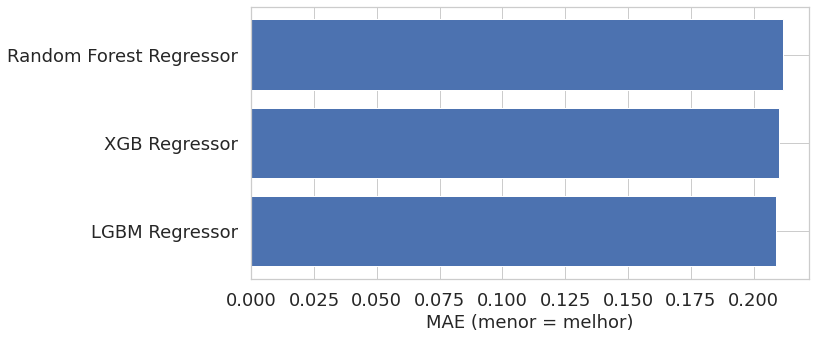

In [ ]:
plt.figure(figsize=(10,5))
plt.barh(*zip(*avaliacao.items()))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('MAE (menor = melhor)', size=18)
plt.show()

### 5.2.7 - Feature Importance.

In [ ]:
print('Running permutation feature importance')
permutation_result = permutation_importance(rf_model, X_val, y_val, n_repeats=5, random_state=42)

Running permutation feature importance


* Mostrando as features mais importantes:

In [ ]:
importances = pd.DataFrame({'column' : X_val.columns, 'importance': permutation_result.importances_mean})
importances.sort_values(by='importance', ascending=False, inplace=True)

#fig, axs = plt.subplots(figsize=(13,8))
#ax = sns.barplot(x='column', y="importance", data=importances)
#plt.xticks(rotation=90)
#plt.tight_layout()

In [ ]:
plt.figure(figsize=(32, 8)) 
plots = sns.barplot(x="column", y="importance", data=importances) 
for bar in plots.patches: 
    
  plots.annotate(format(bar.get_height(), '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=15, xytext=(0, 8), 
                   textcoords='offset points') 
  
plt.title("") 
plt.show() 

In [ ]:
fig = px.bar(importances, y='column', x='importance',
             text_auto='.8f', title='Feature Importance do modelo escolhido', width=1200, 
             height=600)
fig.show()

* Treinando com as features mais importantes:

In [ ]:
best_features = importances.column.tolist()
print(best_features)

['valor_solicitado', 'valor_ativo', 'renda_apurada', 'compr_renda_liq', 'renda_informada', 'compr_renda', 'bacen_valor_vencer', 'bacen_vencidos', 'produto', 'tipo_ativo', 'Diferença Renda', 'pf_pj', 'qtd_imoveis', 'modelo_renda', 'bacen_prejuizo', 'score_combinado', 'motivo_emprestimo', 'qtd_dividas', 'renda_necessaria', 'cidade']


In [ ]:
rf_model_final = RandomForestRegressor(n_estimators=10, max_features=0.8, 
                                 min_samples_leaf=3, criterion='squared_error', 
                                 random_state=42)

rf_model_final.fit(X_train[best_features], y_train)

y_train_pred = rf_model_final.predict(X_train[best_features])
y_val_pred = rf_model_final.predict(X_val[best_features])
y_test_pred = rf_model_final.predict(X_test[best_features])

train_report = metrics_report(y_train, y_train_pred, 'train')
val_report = metrics_report(y_val, y_val_pred, 'validation')
test_report = metrics_report(y_test, y_test_pred, 'test')

final_report = pd.concat([train_report, val_report[['validation']],  test_report[['test']]], axis=1)

#print(f'Baseline report (total features: {len(best_features)})')
print(baseline_report)

            metric  validation
0             RMSE      0.2600
1              MAE      0.1984
2              R^2      0.9341
3             MAPE      0.0160
4      Avg. target     12.3885
5  Avg. Prediction     12.4086


In [ ]:
print(f'Final report (total features: {len(best_features)})')
print(final_report)

Final report (total features: 20)
            metric   train  validation    test
0             RMSE  0.1800      0.2500  0.3300
1              MAE  0.1163      0.1852  0.2236
2              R^2  0.9603      0.9384  0.8825
3             MAPE  0.0094      0.0149  0.0180
4      Avg. target 12.3608     12.3885 12.3663
5  Avg. Prediction 12.3581     12.4059 12.3424


In [ ]:
#devio padrão dessas metricas.

* Plot para a validação cruzada:

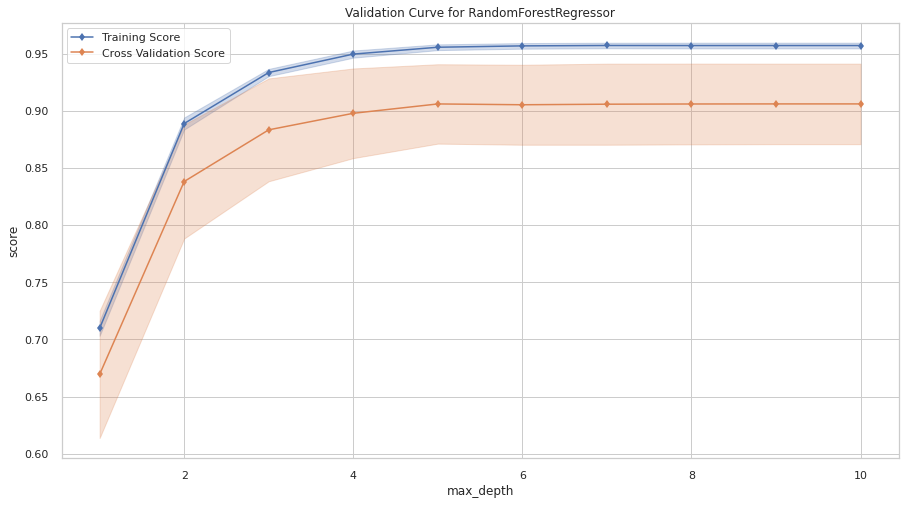

In [ ]:
viz = validation_curve(rf_model,  X_val, y_val, param_name="max_depth",
      param_range=np.arange(1, 11), cv=10, scoring="r2")

obs: profundidade.

* Plot do resultado da previsão:

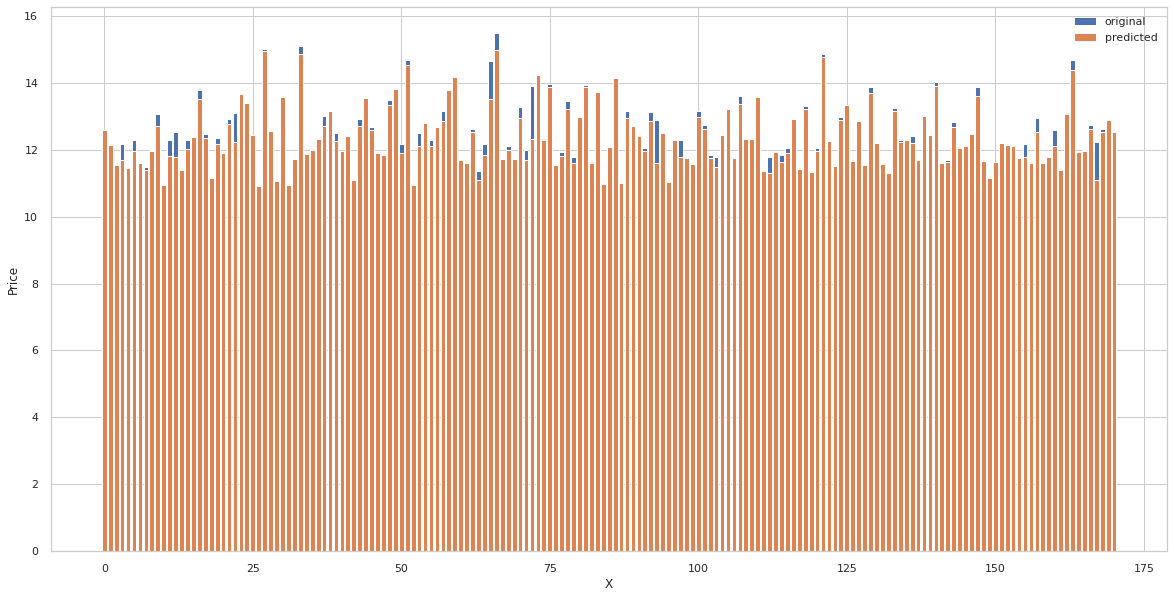

In [ ]:
x_ax = range(len(y_test))
plt.figure(figsize=(20, 10))
plt.bar(x_ax, y_test, label="original")
plt.bar(x_ax, y_test_pred, label="predicted")
plt.title("")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

* Plot em Regressão:


In [ ]:
from scipy.stats import pearsonr

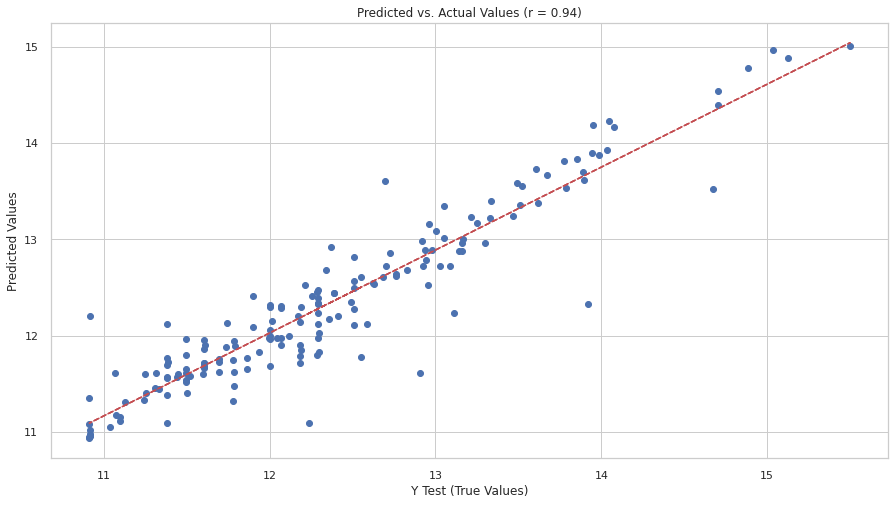

In [ ]:
plt.scatter(y_test, y_test_pred)

z = np.polyfit(y_test, y_test_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), 'r--')

plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.4f})'.format(pearsonr(y_test, y_test_pred)[0], 2))
plt.savefig('Rand_For_Reg_Resid')
plt.show()

### 5.2.8 - Computanto a importancia das features do modelo fina.

In [ ]:
print('Running permutation feature importance with the final model on the held-out testing set')
permutation_result = permutation_importance(rf_model, X_test[best_features], y_test, n_repeats=5, random_state=42)

importances = pd.DataFrame({'column' : X_test[best_features].columns, 'importance': permutation_result.importances_mean})
importances.sort_values(by='importance', ascending=False, inplace=True)

fig, axs = plt.subplots(figsize=(15,8))
ax = sns.barplot(x='column', y="importance", data=importances)
plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
importances

column  importance
1          valor_ativo      0.7806
8       bacen_vencidos      0.0484
9      Diferença Renda      0.0233
5          compr_renda      0.0023
17   motivo_emprestimo      0.0022
7              produto      0.0003
16      bacen_prejuizo      0.0002
3      compr_renda_liq      0.0001
0     valor_solicitado      0.0000
13         qtd_dividas      0.0000
18    renda_necessaria      0.0000
14        modelo_renda      0.0000
10     score_combinado      0.0000
12         qtd_imoveis      0.0000
11          tipo_ativo      0.0000
2        renda_apurada      0.0000
19              cidade      0.0000
15               pf_pj     -0.0002
6   bacen_valor_vencer     -0.0005
4      renda_informada     -0.0090

#### teste

In [ ]:
rando_florest = RandomForestRegressor(random_state=42)

In [ ]:
parameters = {'n_estimators': [10,200],
              'max_features': ['sqrt', 0.1, 0.2, 0.3, 0.4, 0.6],
              'min_samples_leaf': [1, 10]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grind = GridSearchCV(rando_florest, parameters, verbose=1)

In [ ]:
grind.fit(X_train, y_train)

print(f'Melhor Modelo: ' +str(grind.best_estimator_))
print(f'Best Score: ' +str(grind.best_score_))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Melhor Modelo: RandomForestRegressor(max_features=0.4, n_estimators=200, random_state=42)
Best Score: 0.8870586486312899


## Testando outros modelos.

In [ ]:
 modelos_candidatos = {
    "LGBM Regressor" : LGBMRegressor(num_leaves=47),
    "Linear Regression" : LinearRegression(n_jobs=-1),
    "XGB Regressor" : XGBRegressor(n_estimators=100, n_jobs=-1, objective = 'reg:squarederror'),
    "KNN" : KNeighborsRegressor(),
    "Gradient Boosting" : GradientBoostingRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(n_estimators=30, max_features=0.6, min_samples_leaf= 1, random_state=42)
}

In [ ]:
avaliacao = {}
for nome,model in modelos_candidatos.items():

    score = cross_val_score(model,
                            X_train, y_train,  
                            scoring='neg_mean_absolute_error',
                           n_jobs=8 
                           ).mean() 
    avaliacao[nome] = -score 

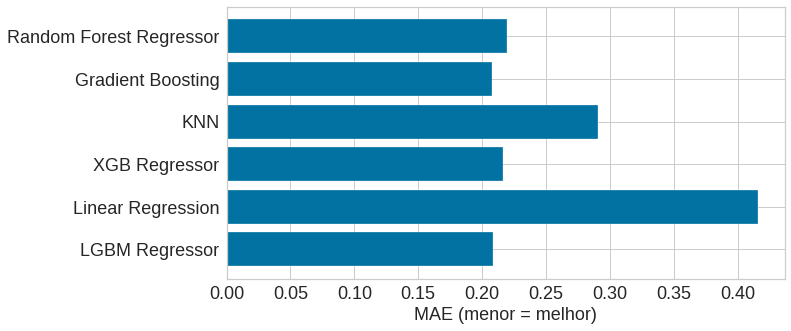

In [ ]:
plt.figure(figsize=(10,5))
plt.barh(*zip(*avaliacao.items()))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('MAE (menor = melhor)', size=18)
plt.show()

In [ ]:
models = {
    "LGBM Regressor" : LGBMRegressor(num_leaves=47),
    "Linear Regression" : LinearRegression(),
    "XGB Regressor" : XGBRegressor(n_estimators=100, n_jobs=-1, objective = 'reg:squarederror'),
    "KNN Regressor" : KNeighborsRegressor(),
    "Gradient Boosting" : GradientBoostingRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(n_estimators=30, max_features=0.6, min_samples_leaf= 1, random_state=42)
}

In [ ]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(X_train, y_train)
    print(f'Training Score: {model.score(X_train, y_train)}')
    print(f'Test Score: {model.score(X_test, y_test)}')
    print(f'Validação: {model.score(X_val, y_val)}')
    print('--')

Using model: LGBM Regressor
Training Score: 0.9906687395188816
Test Score: 0.910809084289836
Validação: 0.9340923456026307
--
Using model: Linear Regression
Training Score: 0.674407912919375
Test Score: 0.2656440355646895
Validação: 0.3394361202995225
--
Using model: XGB Regressor
Training Score: 0.9576679776187977
Test Score: 0.8935266123032731
Validação: 0.9165314640082635
--
Using model: KNN
Training Score: 0.8704809436893601
Test Score: 0.803001953713
Validação: 0.8728420335412308
--
Using model: Gradient Boosting
Training Score: 0.9678245677003666
Test Score: 0.8930410078328429
Validação: 0.9290193805095974
--
Using model: Random Forest Regressor
Training Score: 0.9822358353217444
Test Score: 0.8813785204410683
Validação: 0.9356479429744788
--
